<a href="https://colab.research.google.com/github/loveleen1saini/credit-card-fraud-detection/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
# Install if needed (you already have them, so you can skip this in future runs)
# !pip install xgboost
# !pip install statsmodels

# Numerical and data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensures plots show in notebook
%matplotlib inline

# Plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Scikit-learn (ML & evaluation)
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost
from xgboost import XGBClassifier

# SciPy and statsmodels (stats tools)
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

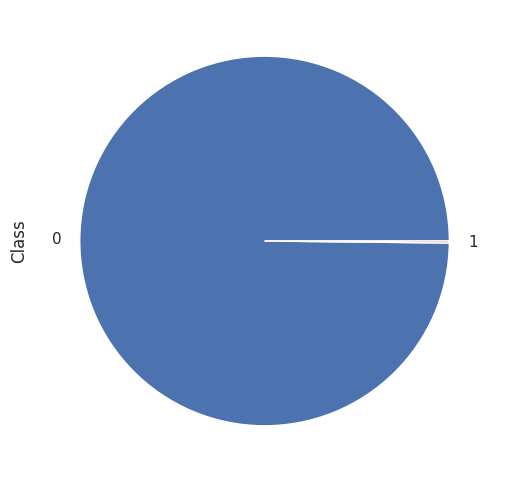

In [ ]:
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

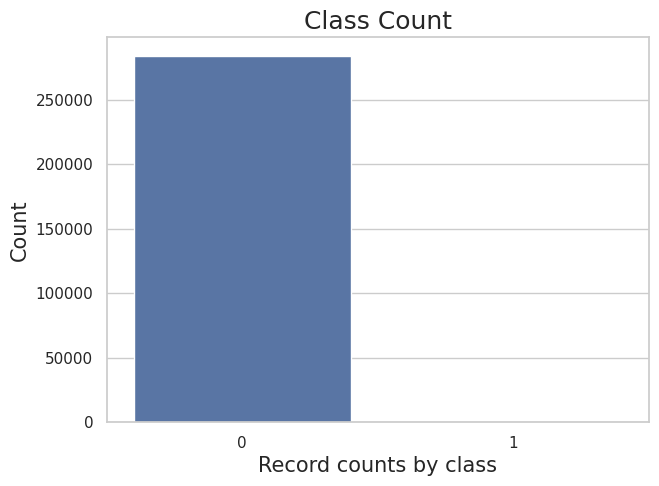

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=df) # Corrected column name to 'Class'
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [ ]:
corr = df.corr()
print(corr)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

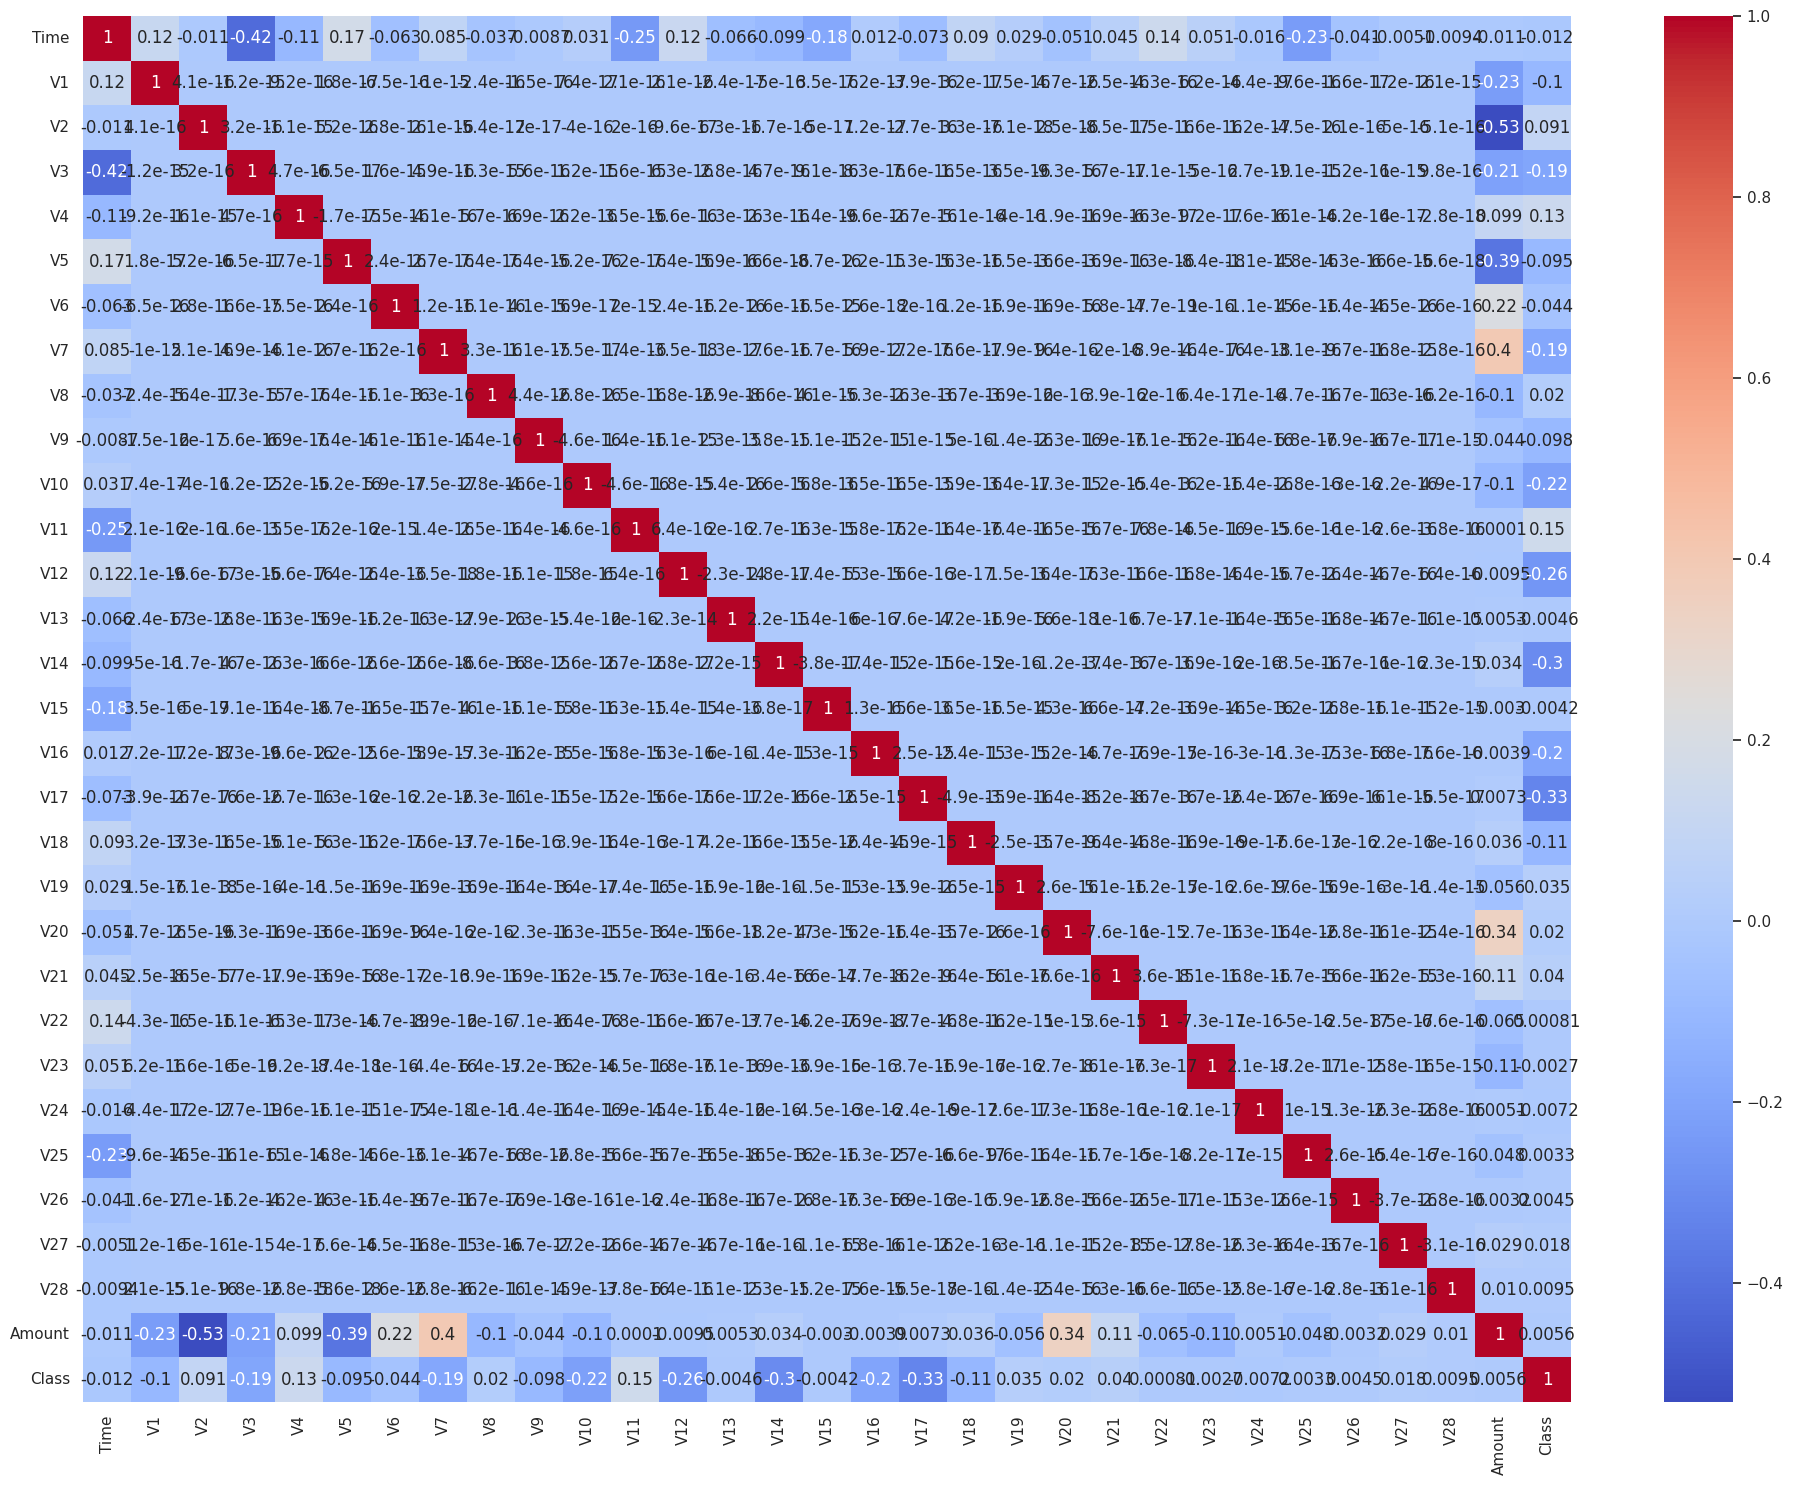

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

df['Time_Day'] = Delta_Time.dt.components.days.astype(int)
df['Time_Hour'] = Delta_Time.dt.components.hours.astype(int)
df['Time_Min'] = Delta_Time.dt.components.minutes.astype(int)


In [ ]:

df.drop('Time', axis=1, inplace=True)
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)


In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')  # load dataframe first

y = df['Class']                     # now you can access the columns
X = df.drop(['Class'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)


In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [ ]:
cols=list(X.columns.values)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ff0d3787380> (for post_execute):


KeyboardInterrupt: 

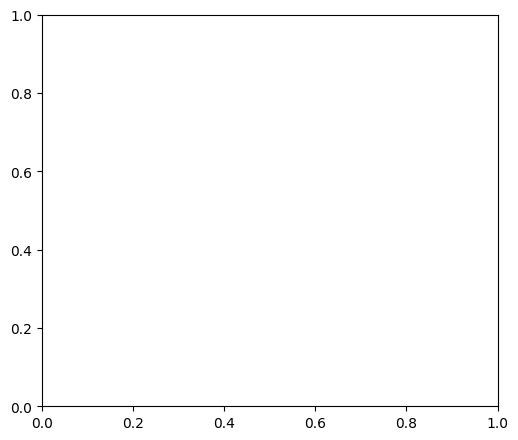

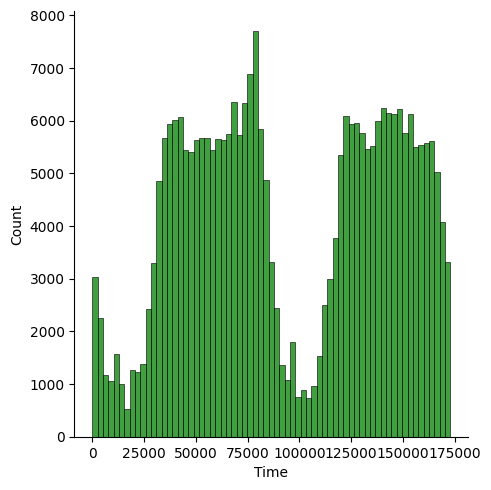

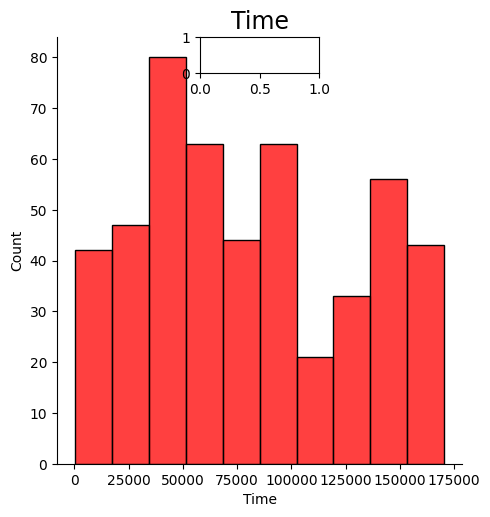

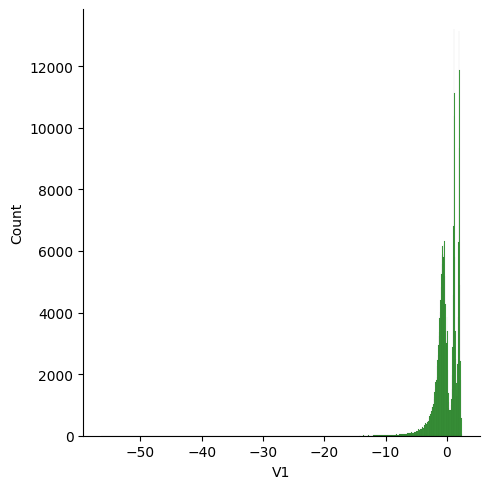

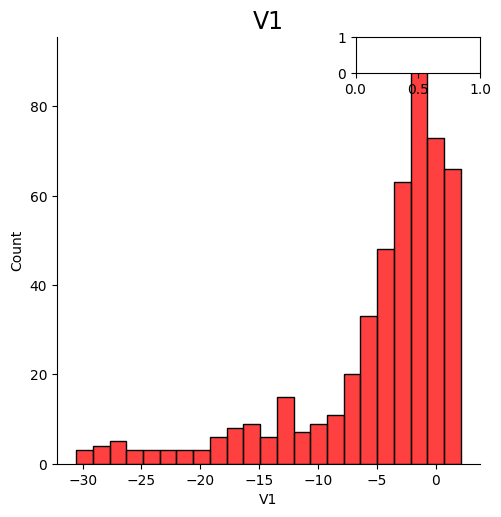

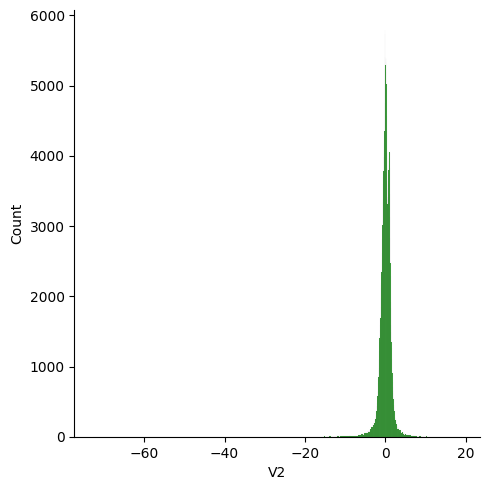

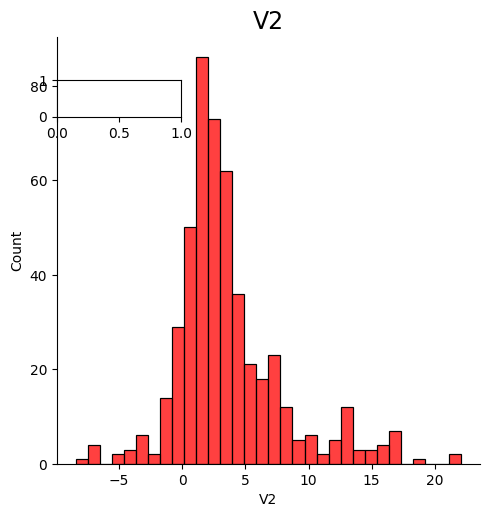

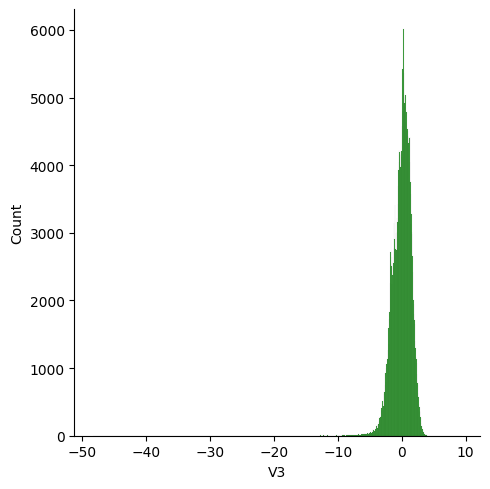

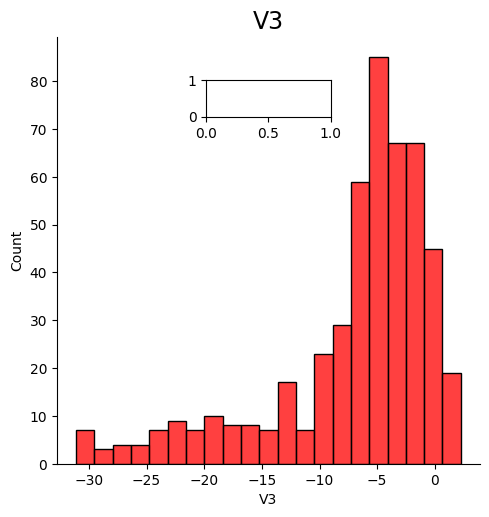

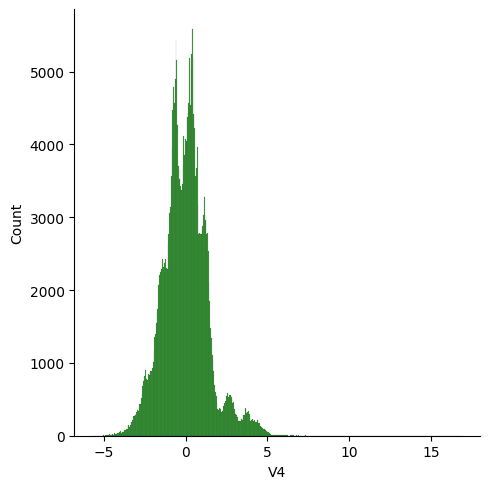

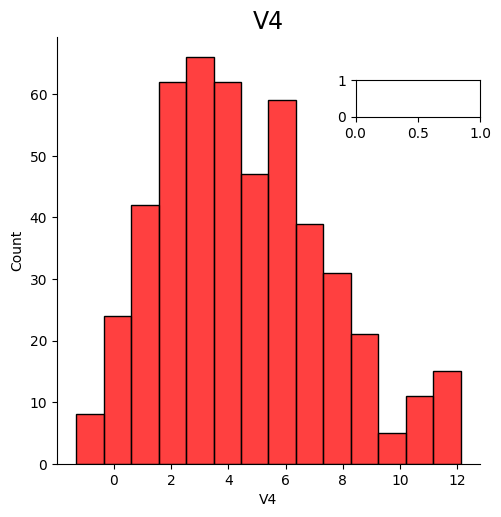

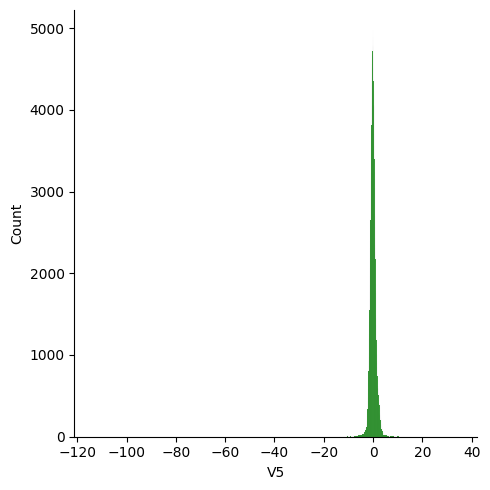

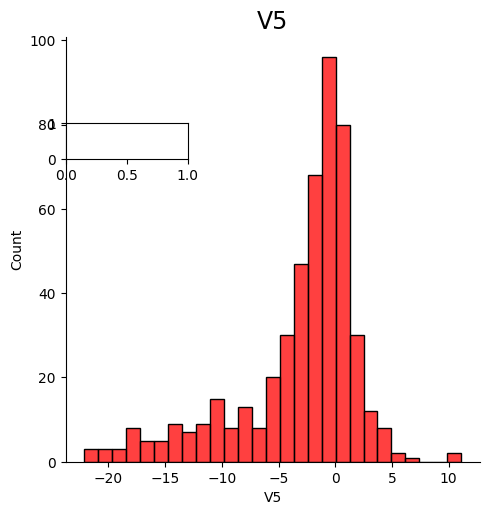

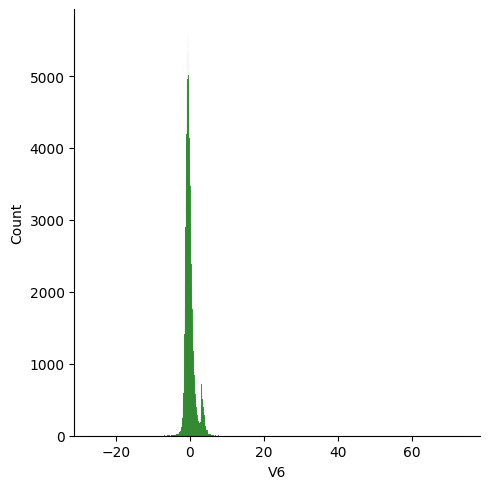

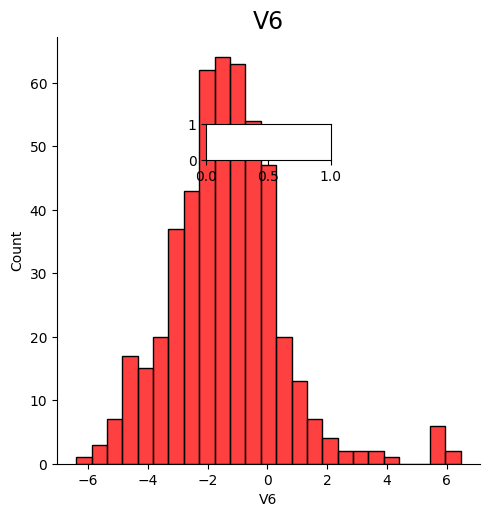

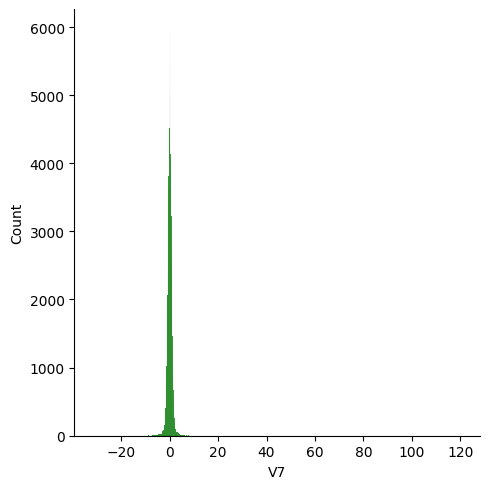

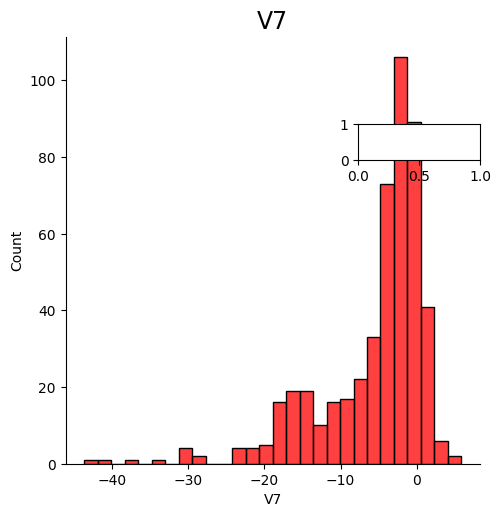

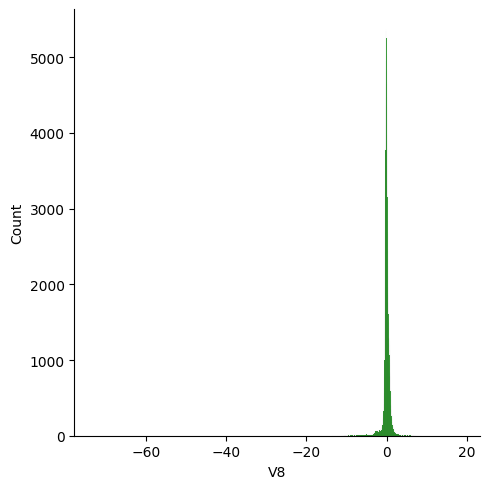

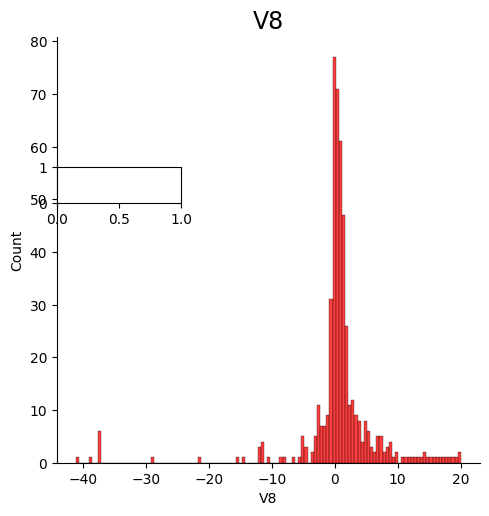

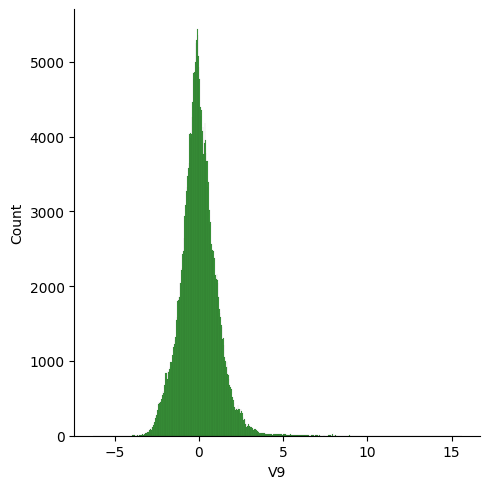

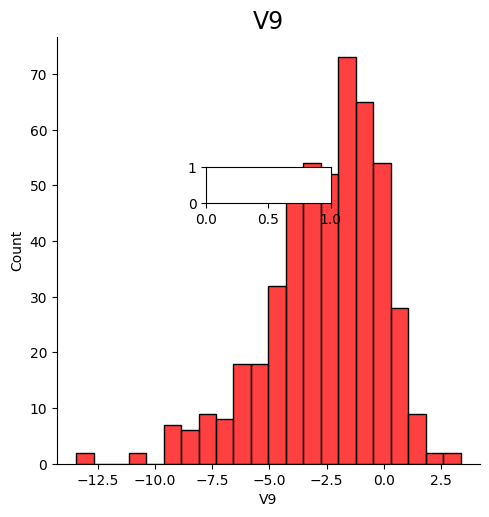

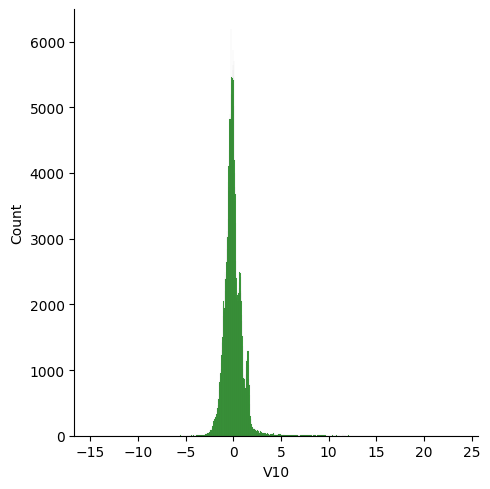

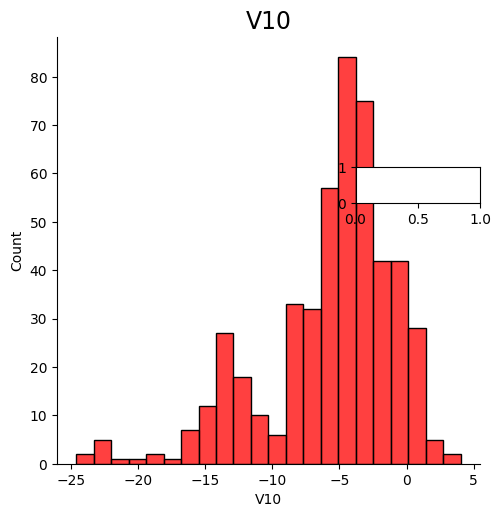

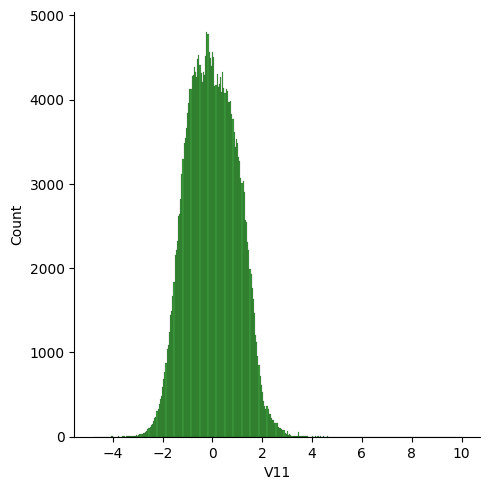

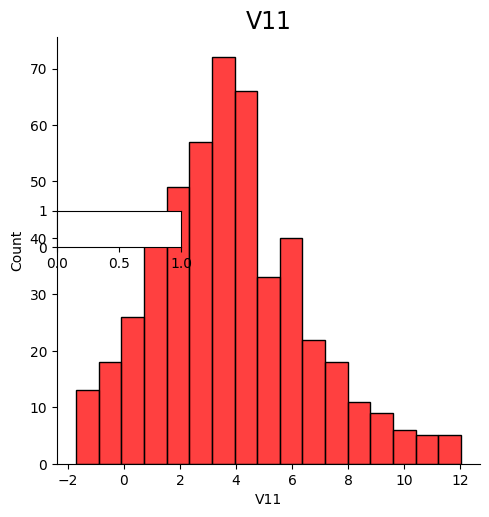

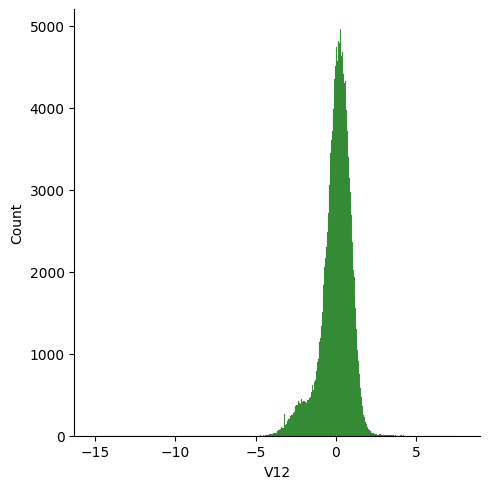

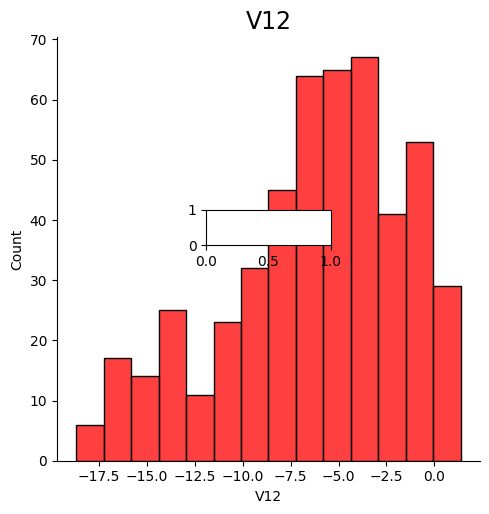

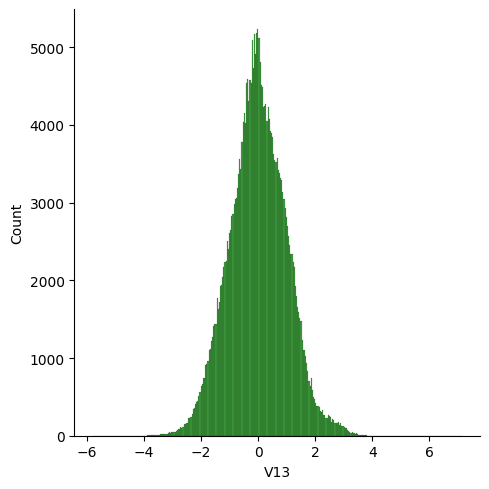

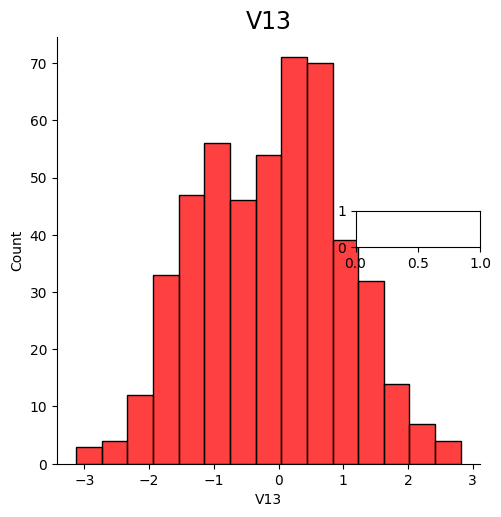

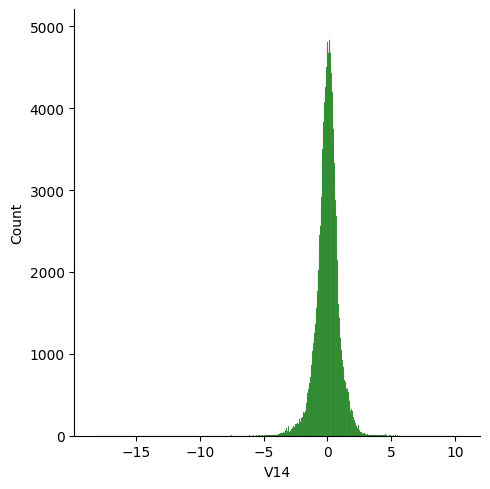

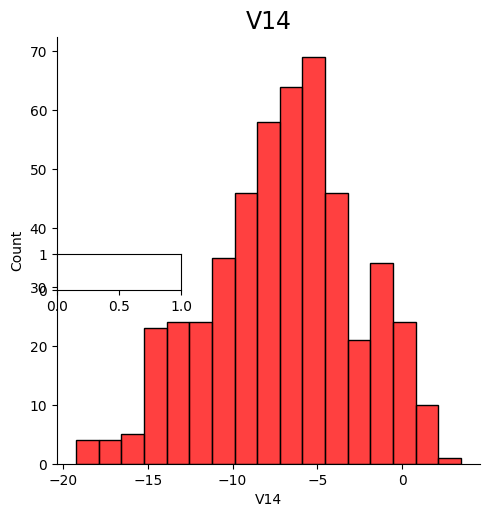

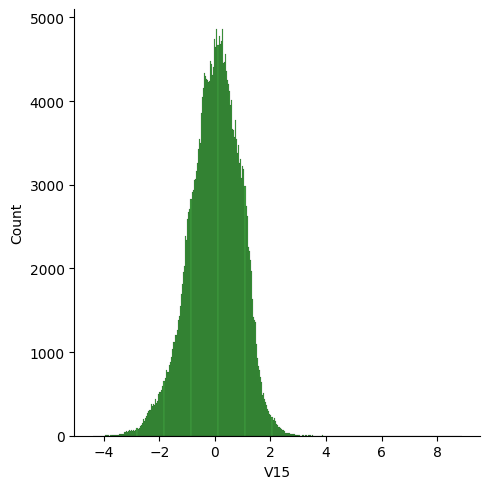

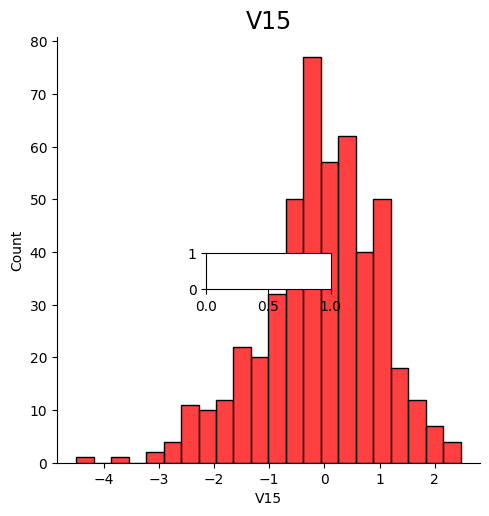

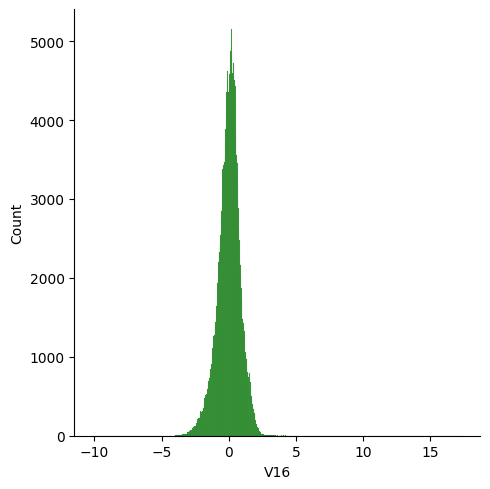

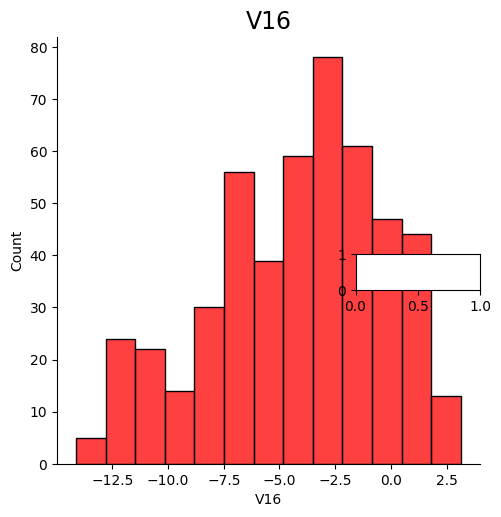

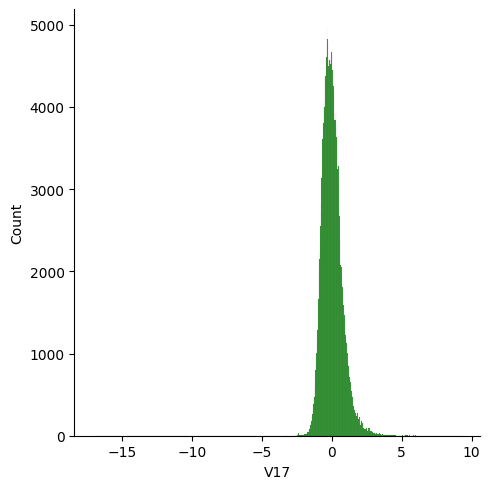

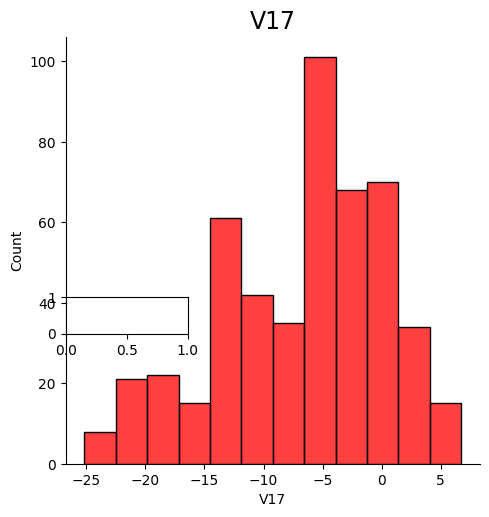

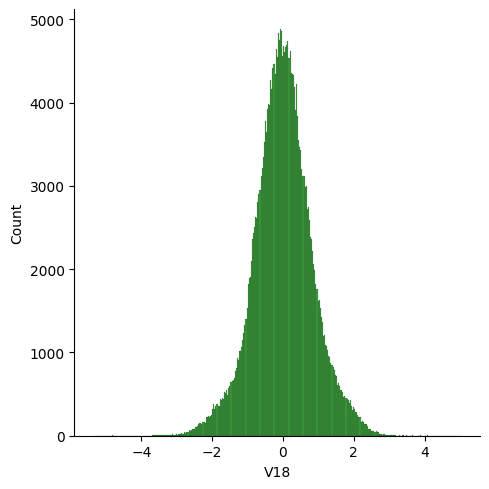

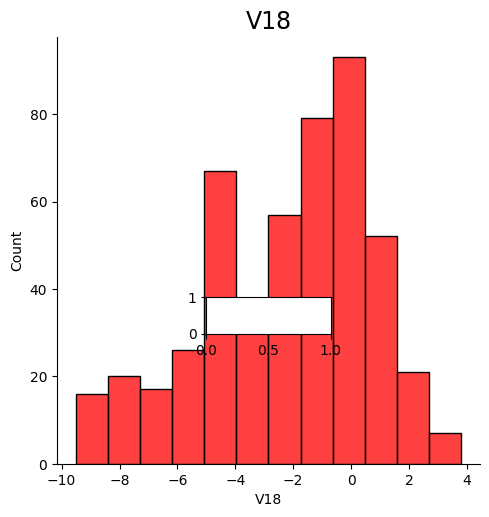

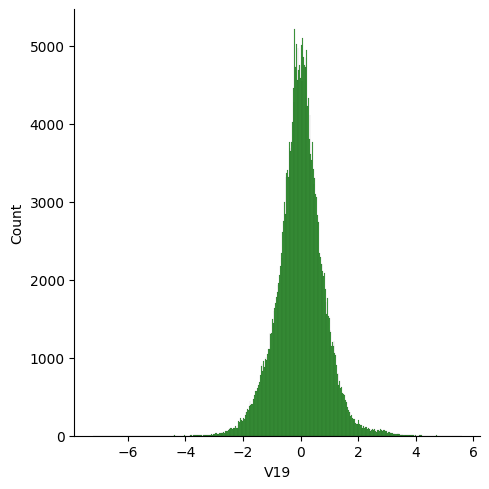

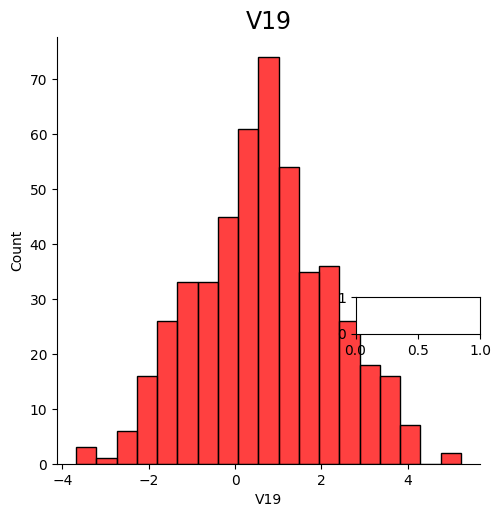

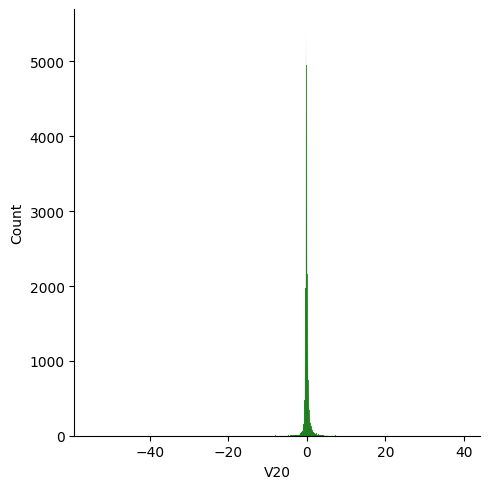

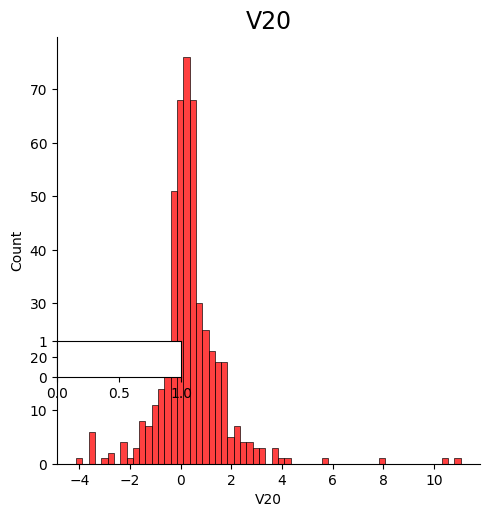

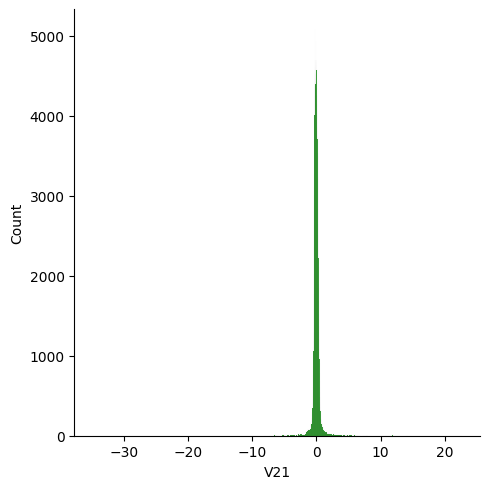

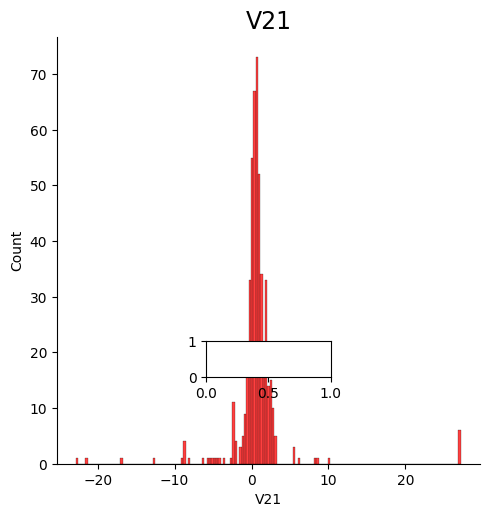

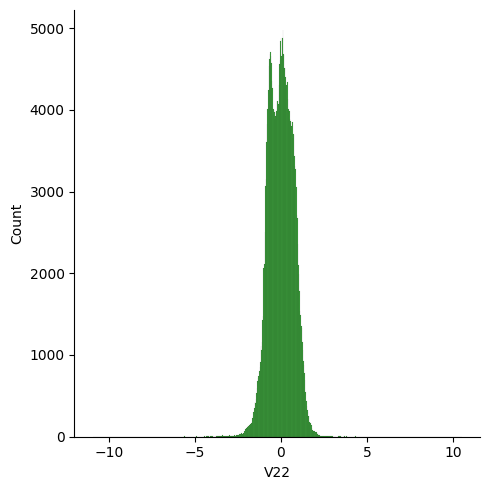

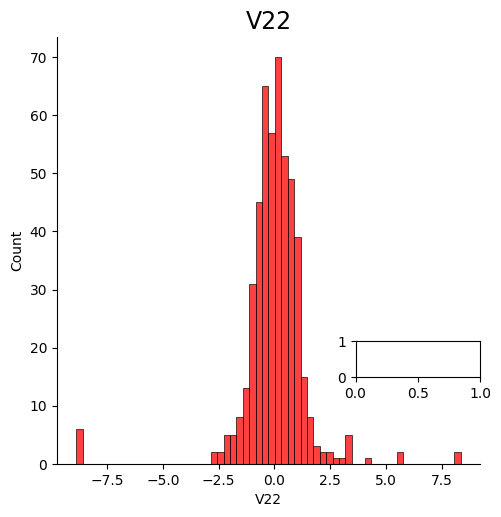

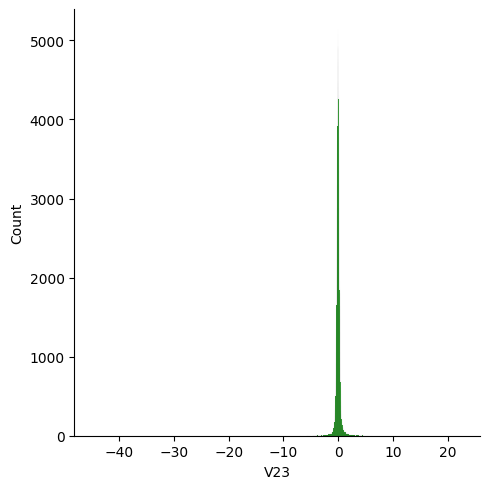

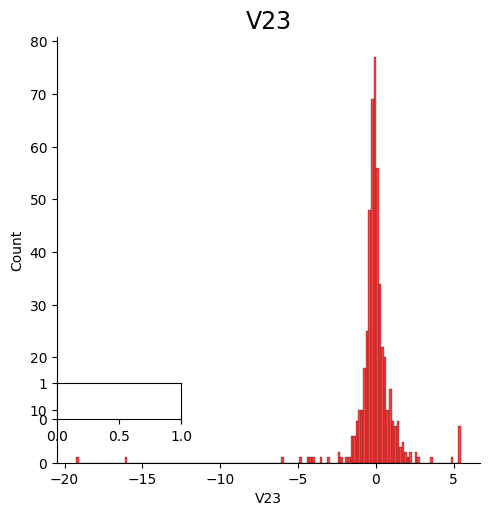

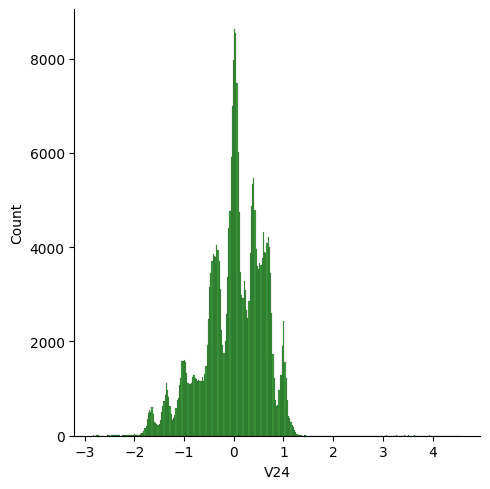

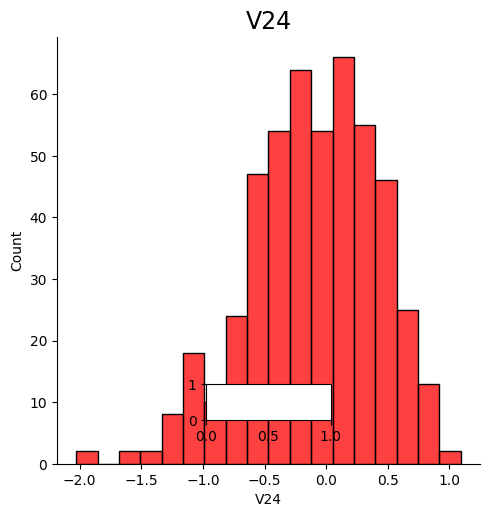

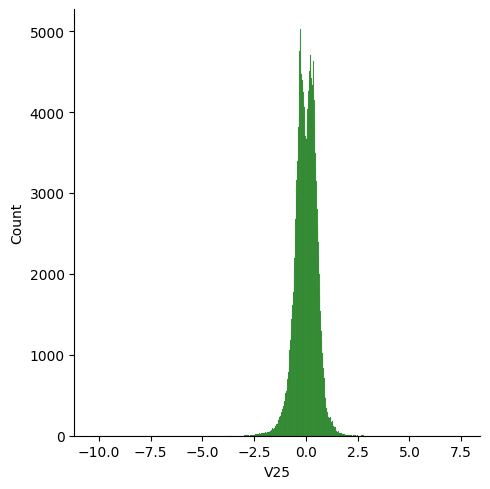

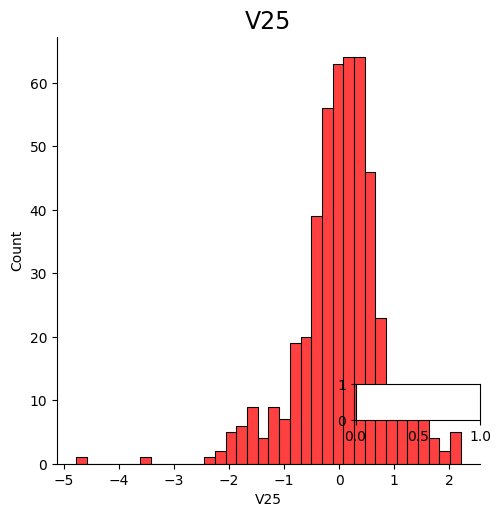

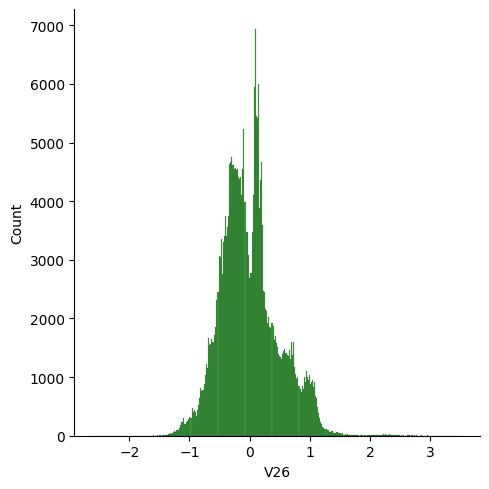

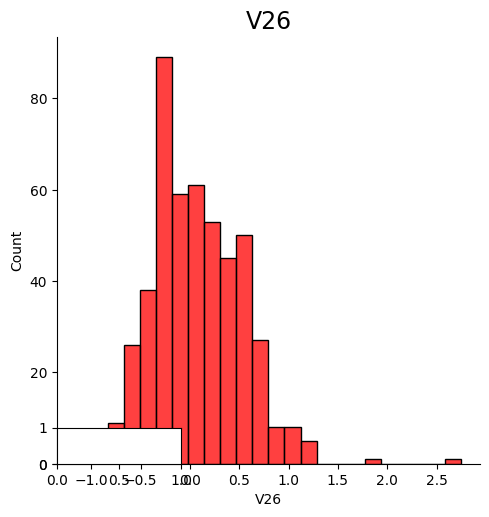

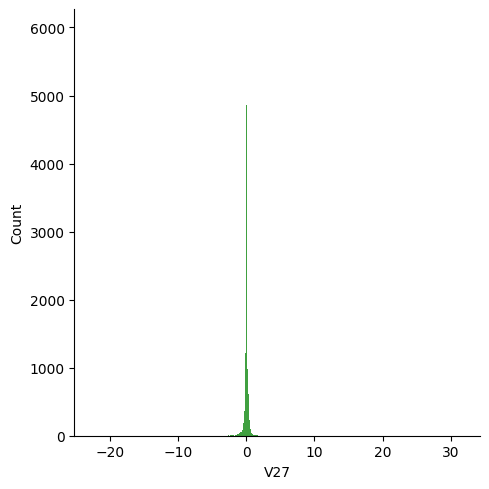

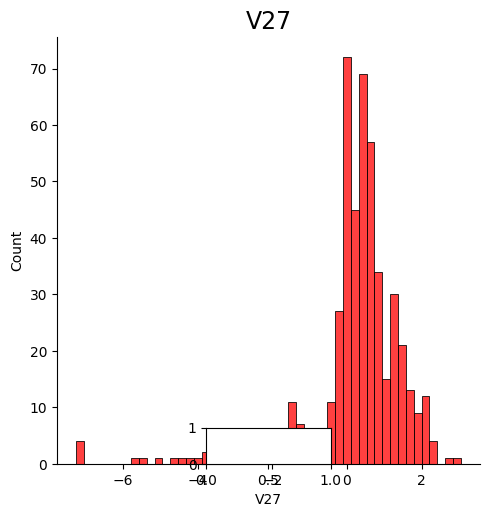

Error in callback <function flush_figures at 0x7ff0d3784d60> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard (1).csv')

X = df.drop('Class', axis=1)
y = df['Class']

cols = list(X.columns.values)

# Create masks for normal and fraud records
normal_records = df['Class'] == 0
fraud_records = df['Class'] == 1


plt.figure(figsize=(20, 60))

for n, col in enumerate(cols):  # fixed 'enurerate' to 'enumerate'
    plt.subplot(10, 3, n + 1)
    sns.displot(X[col][normal_records], color='green')  # fixed 'colour' to 'color'
    sns.displot(X[col][fraud_records], color='red')    # fixed 'colour' to 'color'
    plt.title(col, fontsize=17)

plt.show()



In [ ]:
import pandas as pd
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_values', 'threshold'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)

    category_names = ['Non-Fraudulent', 'Fraudulent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    ticks = np.arange(len(category_names))
    plt.xticks(ticks, category_names, rotation=45)
    plt.yticks(ticks, category_names)

    s = [['TN', 'FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + "=" + str(cm[i][j]), fontsize=12)

    plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn import linear_model, metrics
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)

    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuracy of Logistic Model with L2 Regularisation: {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2,zero_division=0))

    print("Accuracy of Logistic Model with L1 Regularisation: {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1,zero_division=0))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['Logistic Regression with L2 Regularisation'],
      'Accuracy': [Accuracy_l2],
      'roc_value': [l2_roc_value],
      'threshold': [threshold]
    })], ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("L1 roc_value: {0}".format(l1_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(round(roc_auc)))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['Logistic Regression with L1 Regularisation'],
      'Accuracy': [Accuracy_l1],
      'roc_value': [l1_roc_value],
      'threshold': [threshold]
    })], ignore_index=True)

    return df_Results


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

import numpy as np

# Define the range of C values
num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

# Define L1 model
searchCV_l1 = LogisticRegressionCV(
    Cs=num_C,
    penalty='l1',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    solver='liblinear',
    tol=10,
    fit_intercept=True
)

# (Optional) Define L2 model too if you're using it later
searchCV_l2 = LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    solver='newton-cg',
    tol=10,
    fit_intercept=True
)


In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

# Step 3: Split into X and y
y = df['Class']
X = df.drop(['Class'], axis=1)



In [ ]:
# Make sure df is defined already (your creditcard.csv data)
y = df['Class']
X = df.drop(['Class'], axis=1)

from sklearn.model_selection import train_test_split

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# Confirm everything is created
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (227845, 30)
y_train shape: (227845,)
X_test shape: (56962, 30)
y_test shape: (56962,)


In [ ]:
searchCV_l1.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)


LogisticRegressionCV(Cs=[np.float64(1e-10), np.float64(1e-09),
                         np.float64(1e-08), np.float64(1e-07),
                         np.float64(1e-06), np.float64(1e-05),
                         np.float64(0.0001), np.float64(0.001),
                         np.float64(0.01), np.float64(0.1), np.float64(1.0),
                         np.float64(10.0), np.float64(100.0),
                         np.float64(1000.0), np.float64(10000.0),
                         np.float64(100000.0), np.float64(1000000.0),
                         np.float64(10000000.0), np.float64(100000000.0),
                         np.float64(1000000000.0)],
                     cv=KFold(n_splits=10, random_state=42, shuffle=True),
                     max_iter=10000, random_state=42, scoring='roc_auc',
                     solver='newton-cg', tol=10)

In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
y = df['Class']
X = df.drop(['Class'], axis=1)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

# You can print shapes to confirm
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import metrics
!pip install -U scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])
Methodology = "Logistic Regression" # Define Methodology

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)

searchCV_l1 = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l1',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='liblinear',
    tol=10
)

searchCV_l1.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)

print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

print("Parameters for l1 regularisations")
print(searchCV_l1.coef_)
print(searchCV_l1.intercept_)
print(searchCV_l1.scores_)

print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_)
print(searchCV_l2.scores_)

y_pred_l1 = searchCV_l1.predict(X_test)
y_pred_l2 = searchCV_l2.predict(X_test)

y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

print("Accuracy of Logistic Model with L2 Regularisation: {0}".format(Accuracy_l2))
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred_l2)
print("classification Report")
print(classification_report(y_test, y_pred_l2))

print("Accuracy of Logistic Model with L1 Regularisation: {0}".format(Accuracy_l1))
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred_l1)
print("classification Report")
print(classification_report(y_test, y_pred_l1))

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr - fpr)]
print("l2 threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
plt.legend(loc=4)
plt.show()

df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': [Methodology],
    'Model': ['Logistic Regression with L2 Regularisation'],
    'Accuracy': [Accuracy_l2],
    'roc_value': [l2_roc_value],
    'threshold': [threshold]
})], ignore_index=True)

l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
print("L1 roc_value: {0}".format(l1_roc_value))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
threshold = thresholds[np.argmax(tpr - fpr)]
print("L1 threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
plt.plot(fpr, tpr, label="Test, auc=" + str(round(roc_auc)))
plt.legend(loc=4)
plt.show()

df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': [Methodology],
    'Model': ['Logistic Regression with L1 Regularisation'],
    'Accuracy': [Accuracy_l1],
    'roc_value': [l1_roc_value],
    'threshold': [threshold]
})], ignore_index=True)

In [ ]:
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    Knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    Knn.fit(X_train, y_train)

    score = Knn.score(X_test, y_test)
    print("model Score:")
    print(score)

    y_pred = Knn.predict(X_test)

    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

    # Confusion Matrix
    print("Confusion Matrix")
    # Plot Confusion Matrix
    Plot_confusion_matrix(y_test, y_pred)

    # Classification Report
    print("classification Report")
    print(classification_report(y_test, y_pred,zero_division=0))

    # ROC and AUC
    Knn_probs = Knn.predict_proba(X_test)[:, 1]
    Knn_roc_value = roc_auc_score(y_test, Knn_probs)
    print("KNN roc_value: {0}".format(Knn_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, Knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset:", '{:.1%}'.format(roc_auc))

    # Plot ROC Curve
    plt.plot(fpr, tpr, label="Test,auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['KNN'],
      'Accuracy': [score],
      'roc_value': [Knn_roc_value],
      'threshold': [threshold]
    })], ignore_index=True)


    return df_Results


In [ ]:
def buildAndRunTreeModel(df_Results, Methodology, X_train, y_train, X_test, y_test):
    criteria = ['gini', 'entropy']
    scores = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score

        print(c + " score:{0}".format(test_score))
        print("confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification_Report")
        print(classification_report(y_test, y_pred,zero_division=0))
        print(c + " tree_roc_value:{0}".format(tree_roc_value))

        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("Tree Threshold:{0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", '{:.1%}'.format(roc_auc))

        plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
        plt.legend(loc=4)
        plt.show()

        df_Results = pd.concat([df_Results, pd.DataFrame({
          'Methodology': [Methodology],
          'Model': ['DecisionTree'],
          'Accuracy': [test_score],
          'roc_value': [tree_roc_value],
          'threshold': [threshold]
        })], ignore_index=True)


    return df_Results

In [ ]:
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
    RF_model.fit(X_train, y_train)

    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))
    rf_predictions = RF_model.predict(X_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)

    print("Classification Report")
    print(classification_report(y_test, rf_predictions,zero_division=0))

    rf_probs = RF_model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, rf_probs)
    print("Random Forest roc_value: {0}".format(roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to df_Results
    df_Results = pd.concat([df_Results, pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['Random Forest'],
      'Accuracy': [RF_test_score],
      'roc_value': [roc_value],
      'threshold': [threshold]
    })], ignore_index=True)

    return df_Results



In [ ]:

def buildAndRunXGBBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    XGBmodel = XGBClassifier(random_state=42)  # fixed typo: random_stste → random_state
    XGBmodel.fit(X_train, y_train)

    y_pred = XGBmodel.predict(X_test)
    XGB_test_score = XGBmodel.score(X_test, y_test)

    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)

    print("classification Report")
    print(classification_report(y_test, y_pred,zero_division=0))

    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    XGB_roc_value = roc_auc_score(y_test, XGB_probs)  # fixed typo: used correct variable
    print("XGBoost roc_value: {0}".format(XGB_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the latest dataset: {:.1%}".format(roc_auc))  # fixed broken format

    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))  # fixed broken string
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['XGBoost'],
      'Accuracy': [XGB_test_score],
      'roc_value': [XGB_roc_value],
      'threshold': [threshold]
    })], ignore_index=True)


    return df_Results

In [ ]:
def buildAndRunSVModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn import metrics

    # First SVM model
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)

    y_pred_SVM = clf.predict(X_test)
    SVM_score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score: {0}".format(SVM_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM,zero_division=0))

    # Second SVM model for probability and ROC
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc_value: {0}".format(roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))

    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['SVM'],
      'Accuracy': [SVM_score],
      'roc_value': [roc_value],
      'threshold': [threshold]
    })], ignore_index=True)

    return df_Results


In [ ]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for train_index, test_index in rkf.split(X, y):
    print("Train:", train_index,"TEST:",test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


Train: [     0      1      2 ... 284802 284804 284806] TEST: [     3      4      7 ... 284801 284803 284805]
Train: [     1      3      4 ... 284804 284805 284806] TEST: [     0      2      6 ... 284768 284773 284796]
Train: [     0      1      2 ... 284804 284805 284806] TEST: [    19     22     25 ... 284793 284794 284798]
Train: [     0      2      3 ... 284803 284804 284805] TEST: [     1     10     16 ... 284790 284802 284806]
Train: [     0      1      2 ... 284803 284805 284806] TEST: [     5      9     13 ... 284795 284797 284804]
Train: [     1      2      3 ... 284804 284805 284806] TEST: [     0      6     11 ... 284800 284801 284802]
Train: [     0      2      5 ... 284802 284805 284806] TEST: [     1      3      4 ... 284798 284803 284804]
Train: [     0      1      2 ... 284802 284803 284804] TEST: [     5      8     23 ... 284797 284805 284806]
Train: [     0      1      3 ... 284804 284805 284806] TEST: [     2      9     17 ... 284781 284788 284792]
Train: [     0     

Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.9700146078578158
Max auc_roc for l2: 0.5918974573954404
Parameters for l1 regularisations
[[-1.70347949e-05  1.30897399e-02 -1.34156070e-01 -2.48784880e-01
   4.43903261e-02  3.99858621e-03 -7.87749887e-03  1.38717478e-01
  -8.41137442e-02 -8.70103410e-02 -1.39898042e-01 -7.85940438e-02
  -6.77810442e-02 -8.70876137e-02 -3.53624323e-01 -1.90981232e-01
  -1.23147606e-01 -1.88724748e-01  3.71817982e-02 -3.46896776e-03
   1.75550612e-01  1.02295598e-01  1.09621849e-01 -1.42639719e-02
  -2.82872033e-02 -4.36104544e-01 -1.97747979e-02 -9.92322099e-03
   5.31908149e-02 -2.15459042e-03]]
[-3.30909978]
Parameters for l2 regularisations
[[-1.23281681e-04 -1.39476992e-09  1.20019694e-09 -1.36241185e-08
   1.83333591e-09 -1.24350425e-09 -2.40711440e-09 -3.82037514e-09
   6.71296427e-10 -6.75401953e-09 -3.34907776e-09 -2.05888061e-09
   2.24439077e-09 -4.85010362e-09 -1.00983128e-08 -1.87734723e-10
  -3.26269457e-09 -7.8025799

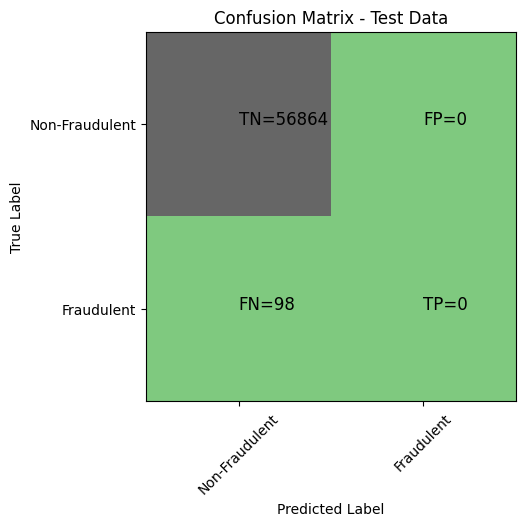

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic Model with L1 Regularisation: 0.9989993328885924
Confusion Matrix


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


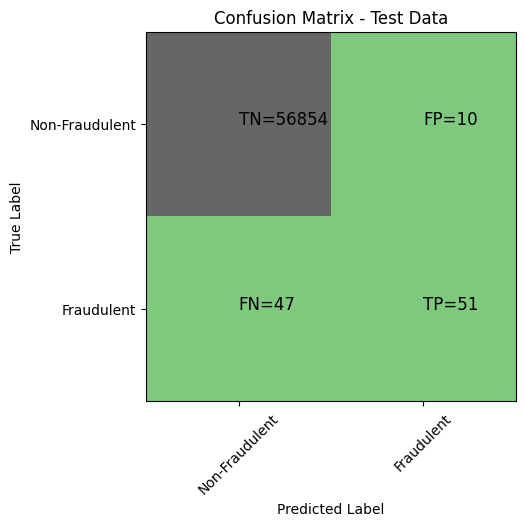

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.550388215922272
l2 threshold: 3.1845176790826747e-06
ROC for the test dataset 55.0%


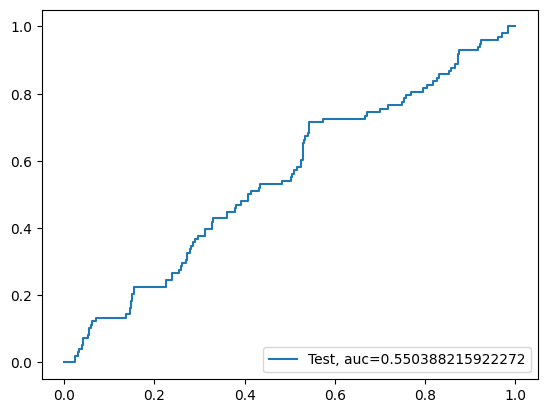

L1 roc_value: 0.9520032759868156
L1 threshold: 0.024608310890633575
ROC for the test dataset 95.2%


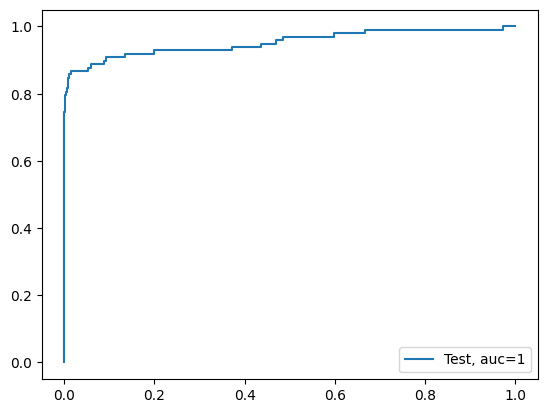

Time Taken by Model:--- 130.94348216056824 seconds ---
------------------------------------------------------------
KNN Model
model Score:
0.9983673326077034
Confusion Matrix


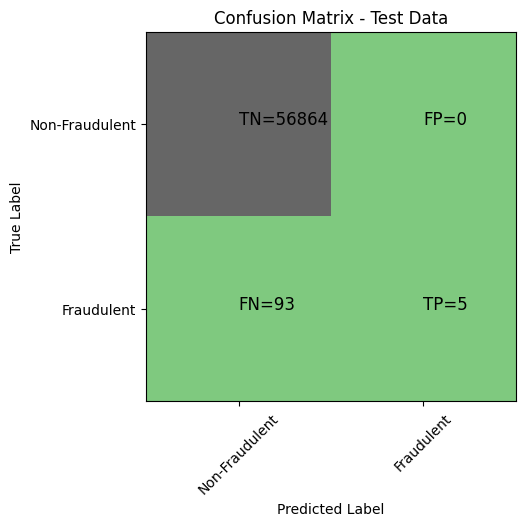

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.6059132854042011
KNN threshold: 0.2
ROC for the test dataset: 60.6%


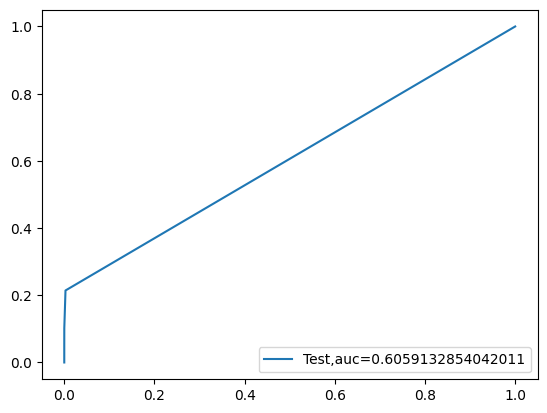

Time Taken by Model:--- 279.9478108882904 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score:0.9990519995786665
confusion Matrix


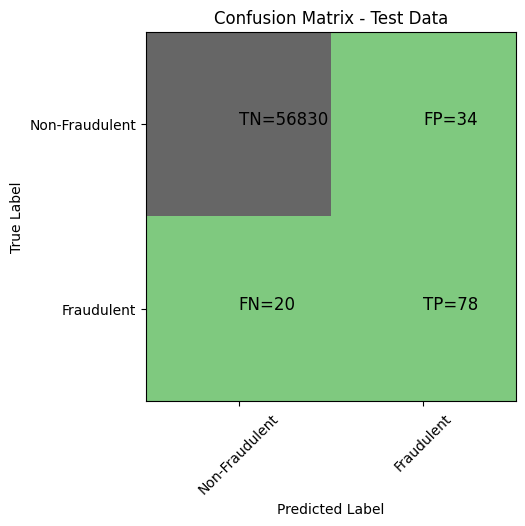

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value:0.8976602247539421
Tree Threshold:1.0
ROC for the test dataset 89.8%


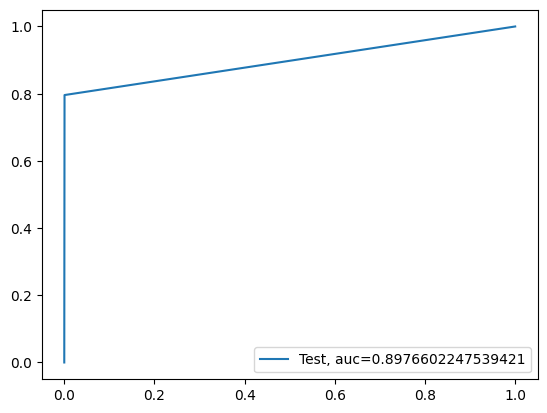

entropy score:0.9990871107053826
confusion Matrix


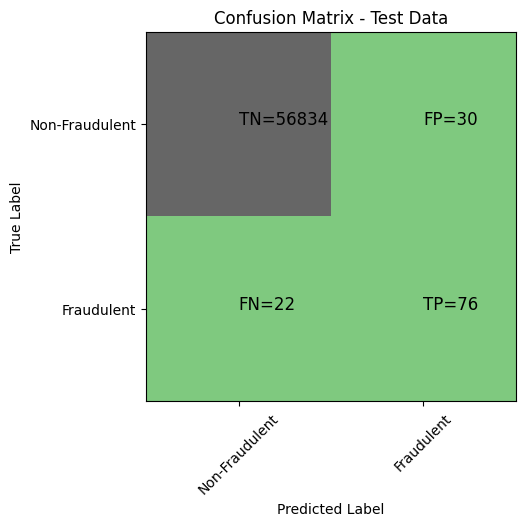

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.78      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value:0.8874913147588805
Tree Threshold:1.0
ROC for the test dataset 88.7%


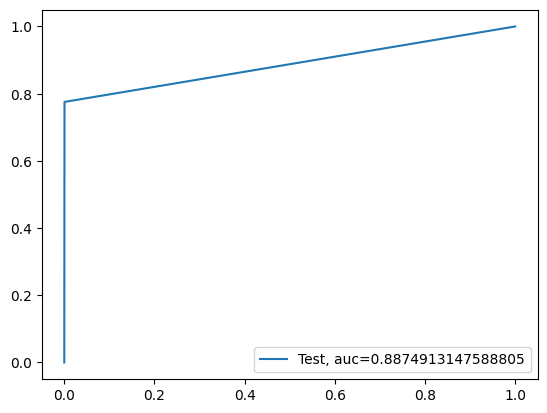

Time Taken by Model:--- 48.38530683517456 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995611109160493
Confusion Matrix


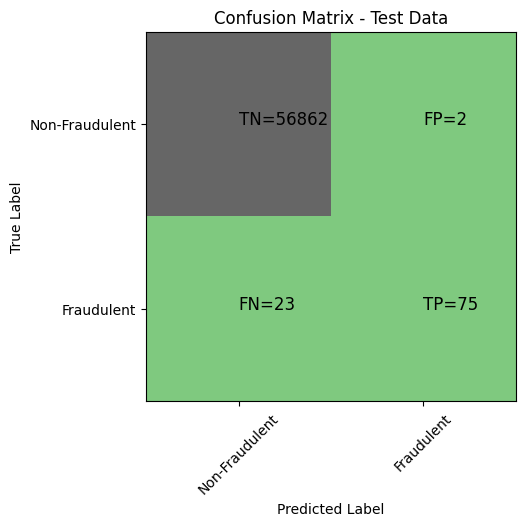

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9476116663604103
Random Forest threshold: 0.03
ROC for the test dataset 94.8%


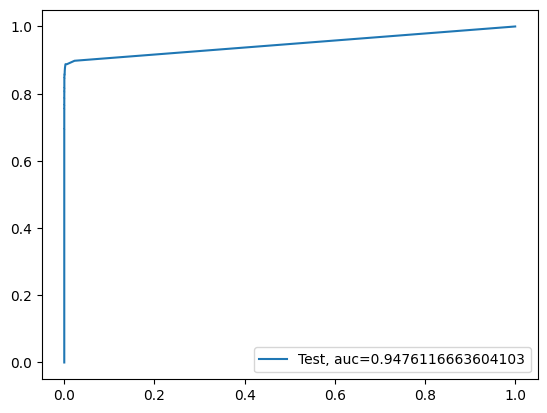

Time Taken by Model:--- 360.8762149810791 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995786664794073
Confusion Matrix


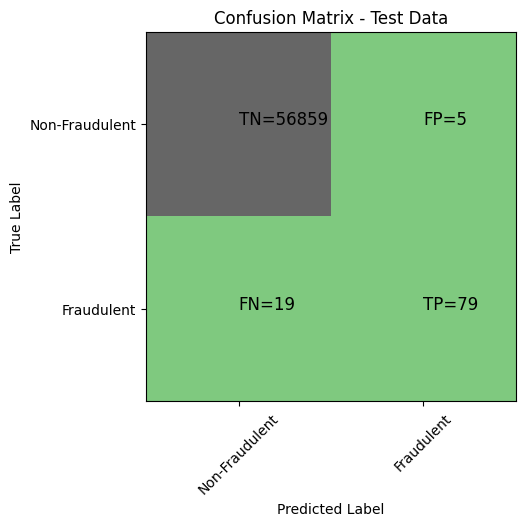

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.940590259035522
XGBoost threshold: 0.0001347712823189795
ROC for the latest dataset: 94.1%


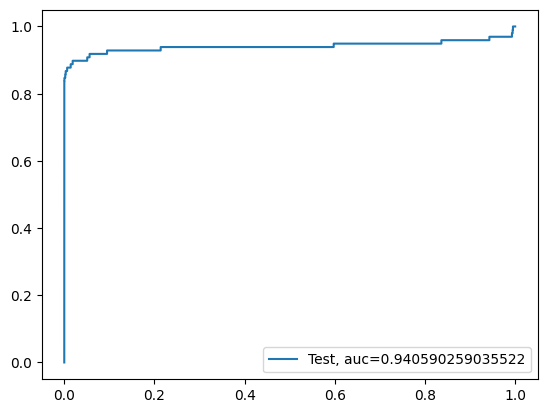

Time Taken by Model:--- 5.382994890213013 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score: 0.9982795547909132
Confusion Matrix


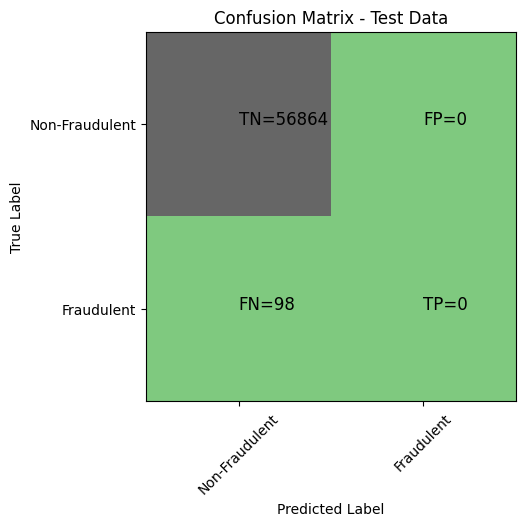

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


SVM roc_value: 0.44937293994694105
SVM threshold: 0.0015205128042757726
ROC for the test dataset 44.9%


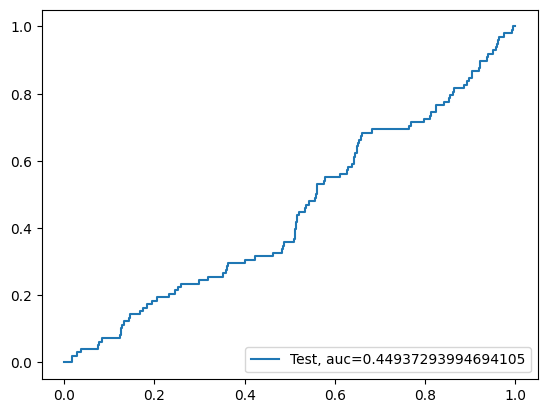

Time Taken by Model:--- 644.2803995609283 seconds ---


In [ ]:
import time
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Add back the deprecated .append() method using pd.concat()
if not hasattr(pd.DataFrame, 'append'):
    def append(self, other, ignore_index=False, verify_integrity=False, sort=False):
        return pd.concat([self, other], ignore_index=ignore_index, verify_integrity=verify_integrity, sort=sort)
    pd.DataFrame.append = append

from sklearn.neighbors import KNeighborsClassifier
df_Results = pd.DataFrame()
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.2, random_state=42)

print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))


In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998280,0.550388,0.000003
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998999,0.952003,0.024608
2,RepeatedKFold Cross Validation,KNN,0.998367,0.605913,0.200000
3,RepeatedKFold Cross Validation,DecisionTree,0.999052,0.897660,1.000000
4,RepeatedKFold Cross Validation,DecisionTree,0.999087,0.887491,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999561,0.947612,0.030000
6,RepeatedKFold Cross Validation,XGBoost,0.999579,0.940590,0.000135
7,RepeatedKFold Cross Validation,SVM,0.998280,0.449373,0.001521


In [ ]:
from sklearn.model_selection import StratifiedKFold

rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

    X_train_SKF_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      2 ... 284801 284802 284805] TEST: [     9     12     15 ... 284803 284804 284806]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2      6 ... 284793 284799 284802]
TRAIN: [     1      2      4 ... 284803 284804 284806] TEST: [     0      3      8 ... 284792 284801 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    13     16     20 ... 284781 284794 284797]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4      5     10 ... 284795 284796 284798]


In [ ]:
from sklearn.model_selection import StratifiedKFold
import time
import pandas as pd

# Assumes you already have X, y, and buildAndRunLogisticModels() defined
df_Results = pd.DataFrame()

# Safe StratifiedKFold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_idx], y.iloc[test_idx]



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



=== Fold 1 ===
Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.9645627999349611
Max auc_roc for l2: 0.5724529922953505
Parameters for l1 regularisations
[[-1.69618477e-05  7.07816903e-03 -1.34039500e-01 -2.56149709e-01
   3.85665870e-02 -1.26105823e-02 -9.62432221e-03  1.42850665e-01
  -8.18442395e-02 -8.28699229e-02 -1.35718474e-01 -8.57925948e-02
  -5.97690013e-02 -8.95274798e-02 -3.47509116e-01 -1.82961443e-01
  -1.15491823e-01 -1.76692872e-01  4.03496969e-02 -9.98493278e-03
   1.71481076e-01  1.16142429e-01  9.70390902e-02 -1.78895797e-02
  -2.04572003e-02 -4.24872091e-01 -2.82919180e-02 -1.02157224e-02
   6.62076277e-02 -2.21590472e-03]]
[-3.30367446]
Parameters for l2 regularisations
[[-1.21895111e-04 -1.68984152e-09  1.38864583e-09 -1.36547966e-08
   1.83509888e-09 -1.52260260e-09 -2.40372367e-09 -4.08015779e-09
   4.16531158e-10 -6.66104005e-09 -3.44639518e-09 -2.02800170e-09
   2.07500526e-09 -4.88286036e-09 -9.88602074e-09 -1.72089277e-10
  -3.3194951

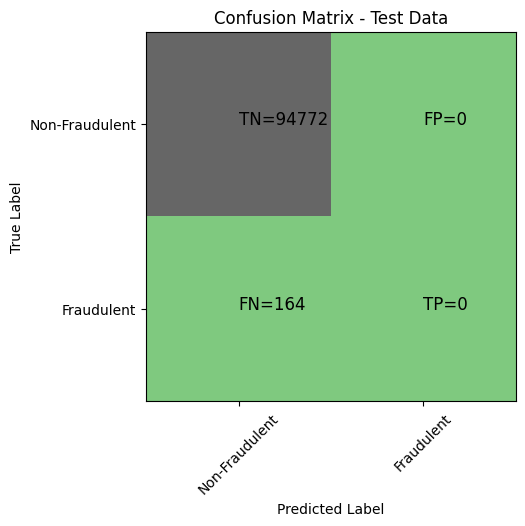

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.00      0.00      0.00       164

    accuracy                           1.00     94936
   macro avg       0.50      0.50      0.50     94936
weighted avg       1.00      1.00      1.00     94936

Accuracy of Logistic Model with L1 Regularisation: 0.9989150585657707
Confusion Matrix


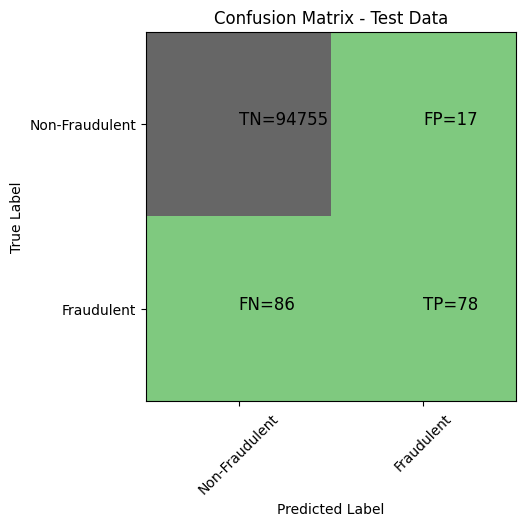

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.82      0.48      0.60       164

    accuracy                           1.00     94936
   macro avg       0.91      0.74      0.80     94936
weighted avg       1.00      1.00      1.00     94936

l2 roc_value: 0.5979320844995898
l2 threshold: 0.0006790021639799922
ROC for the test dataset 59.8%


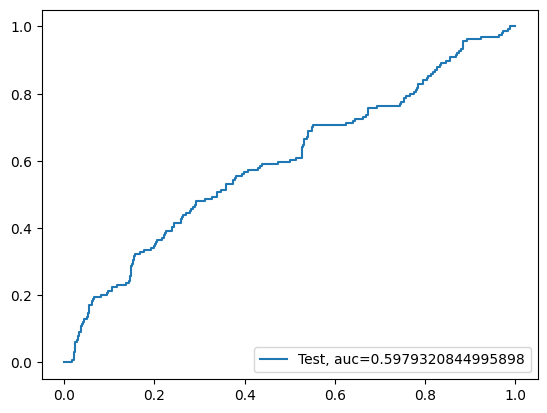

L1 roc_value: 0.9555292779693085
L1 threshold: 0.024027347689906418
ROC for the test dataset 95.6%


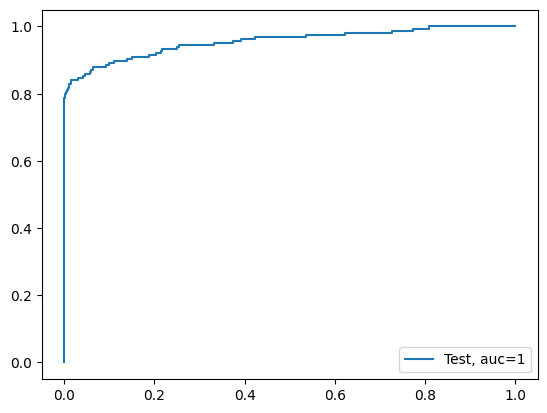

Time Taken by Model:--- 113.45183849334717 seconds ---
------------------------------------------------------------
KNN Model
model Score:
0.9983251874947333
Confusion Matrix


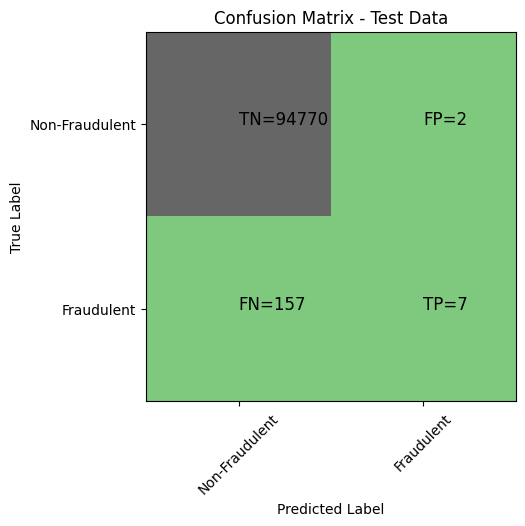

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.78      0.04      0.08       164

    accuracy                           1.00     94936
   macro avg       0.89      0.52      0.54     94936
weighted avg       1.00      1.00      1.00     94936

KNN roc_value: 0.6052376795451574
KNN threshold: 0.2
ROC for the test dataset: 60.5%


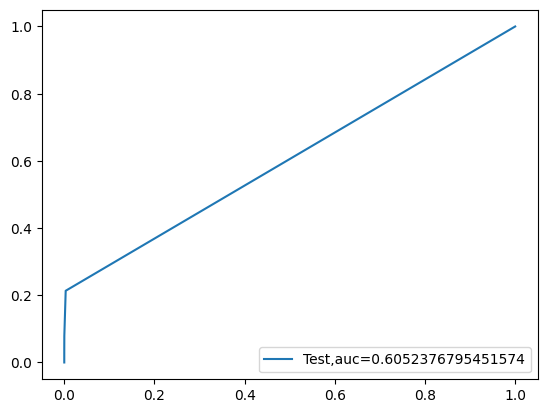

Time Taken by Model:--- 654.4723753929138 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score:0.9991783938653409
confusion Matrix


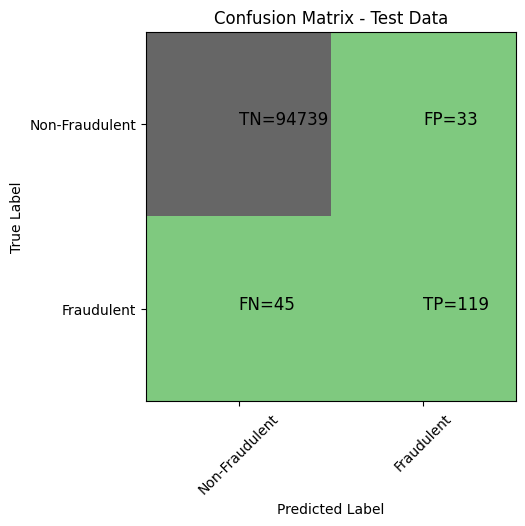

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.78      0.73      0.75       164

    accuracy                           1.00     94936
   macro avg       0.89      0.86      0.88     94936
weighted avg       1.00      1.00      1.00     94936

gini tree_roc_value:0.862630775993321
Tree Threshold:1.0
ROC for the test dataset 86.3%


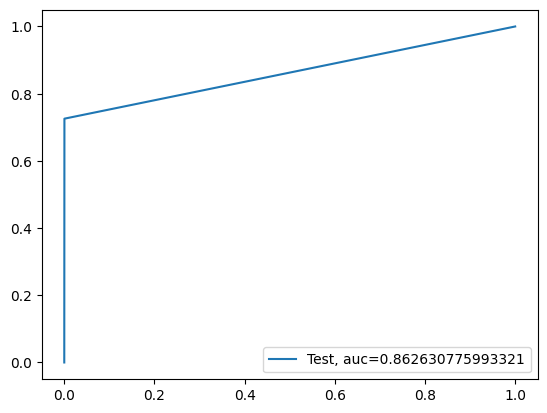

entropy score:0.9992310609252549
confusion Matrix


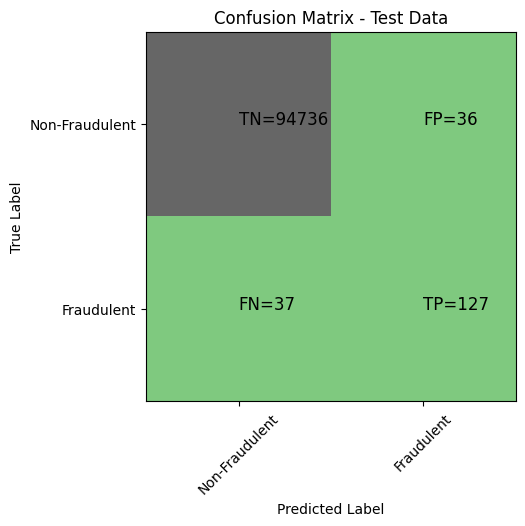

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.78      0.77      0.78       164

    accuracy                           1.00     94936
   macro avg       0.89      0.89      0.89     94936
weighted avg       1.00      1.00      1.00     94936

entropy tree_roc_value:0.8870051924361729
Tree Threshold:1.0
ROC for the test dataset 88.7%


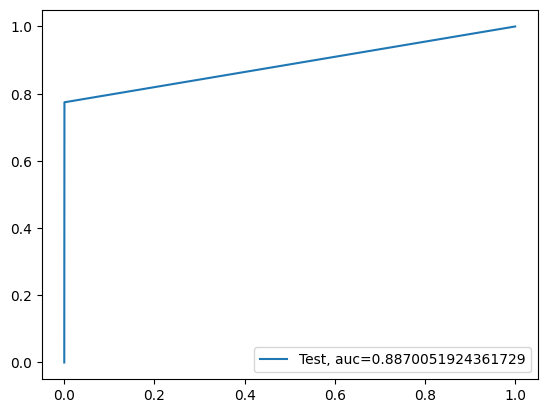

Time Taken by Model:--- 38.216108560562134 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995681301087048
Confusion Matrix


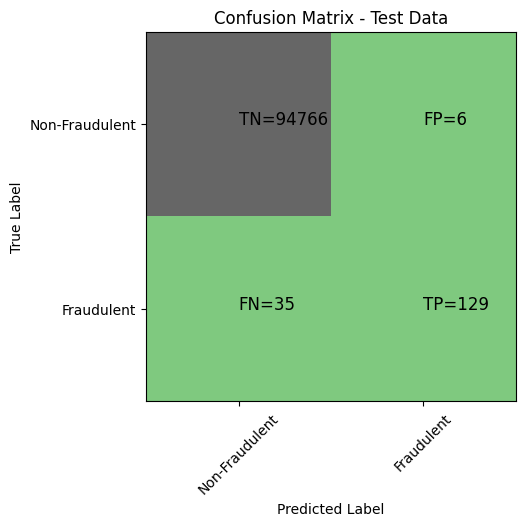

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.96      0.79      0.86       164

    accuracy                           1.00     94936
   macro avg       0.98      0.89      0.93     94936
weighted avg       1.00      1.00      1.00     94936

Random Forest roc_value: 0.9374061611796423
Random Forest threshold: 0.02
ROC for the test dataset 93.7%


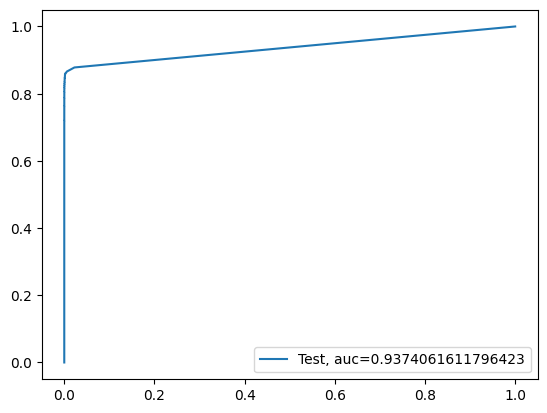

Time Taken by Model:--- 282.7682569026947 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9973771804162804
Confusion Matrix


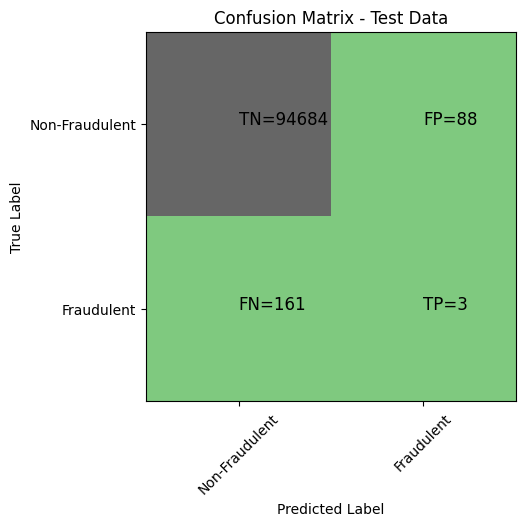

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.03      0.02      0.02       164

    accuracy                           1.00     94936
   macro avg       0.52      0.51      0.51     94936
weighted avg       1.00      1.00      1.00     94936

XGBoost roc_value: 0.5141734900603554
XGBoost threshold: 7.704452136932211e-36
ROC for the latest dataset: 51.4%


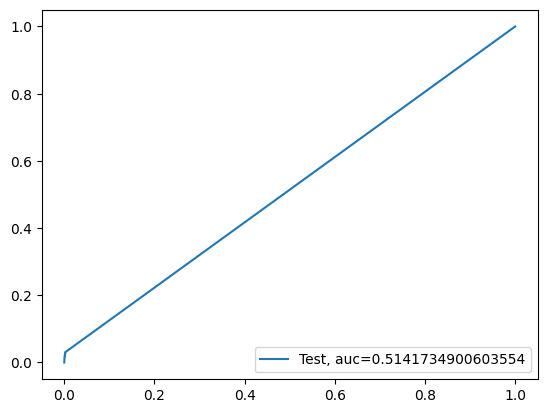

Time Taken by Model:--- 4.716013193130493 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score: 0.9982725204348193
Confusion Matrix


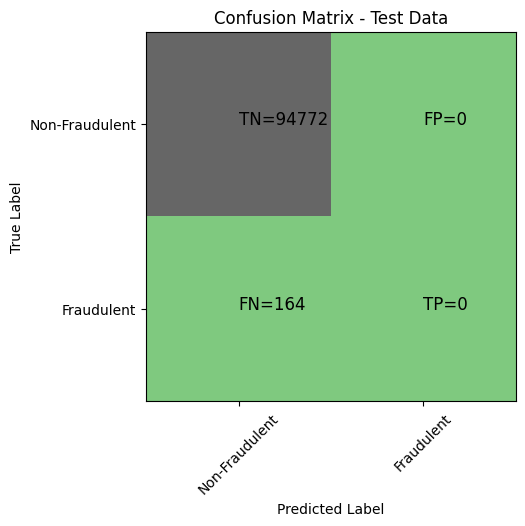

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.00      0.00      0.00       164

    accuracy                           1.00     94936
   macro avg       0.50      0.50      0.50     94936
weighted avg       1.00      1.00      1.00     94936

SVM roc_value: 0.5102895215526249
SVM threshold: 0.0014801996337868455
ROC for the test dataset 51.0%


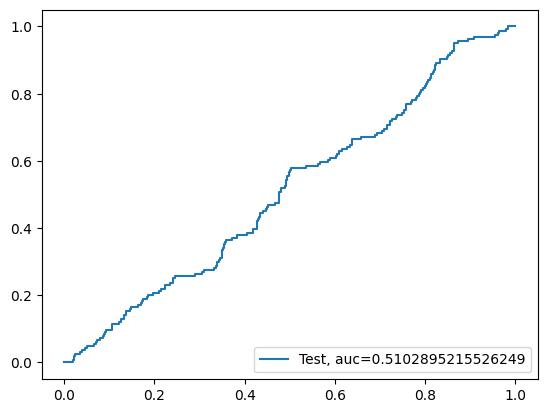

Time Taken by Model:--- 150.595073223114 seconds ---
------------------------------------------------------------

=== Fold 2 ===
Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.966268817336615
Max auc_roc for l2: 0.5889267830688001
Parameters for l1 regularisations
[[-1.69774991e-05  1.56220400e-02 -1.39368031e-01 -2.48213318e-01
   4.55750601e-02 -2.79238147e-03 -3.13917221e-03  1.55769342e-01
  -8.19807937e-02 -9.02085795e-02 -1.36136226e-01 -6.97297939e-02
  -7.55309772e-02 -9.11057438e-02 -3.51864919e-01 -1.94645052e-01
  -1.22700850e-01 -1.99800677e-01  3.70800877e-02 -1.07867262e-03
   2.00470274e-01  9.59382572e-02  1.07570066e-01  2.85160268e-02
  -2.45619646e-02 -4.22026849e-01 -8.35280425e-03  1.34130866e-02
   5.25159934e-02 -2.22126889e-03]]
[-3.30599866]
Parameters for l2 regularisations
[[-1.22765146e-04 -1.26487704e-09  1.03533710e-09 -1.33796497e-08
   1.67568915e-09 -1.23725613e-09 -2.29509310e-09 -3.57304662e-09
   5.35093446e-10 -6.60990885e-

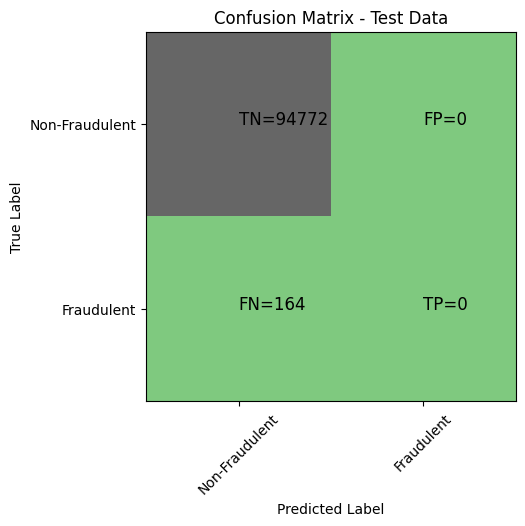

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.00      0.00      0.00       164

    accuracy                           1.00     94936
   macro avg       0.50      0.50      0.50     94936
weighted avg       1.00      1.00      1.00     94936

Accuracy of Logistic Model with L1 Regularisation: 0.9990519929215471
Confusion Matrix


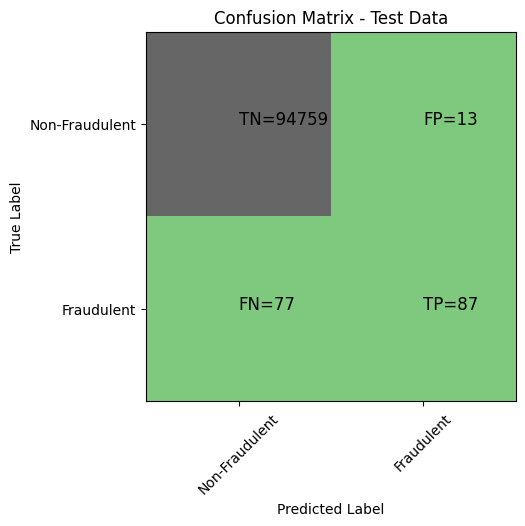

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.87      0.53      0.66       164

    accuracy                           1.00     94936
   macro avg       0.93      0.77      0.83     94936
weighted avg       1.00      1.00      1.00     94936

l2 roc_value: 0.5664886484945126
l2 threshold: 1.2765873772511186e-06
ROC for the test dataset 56.6%


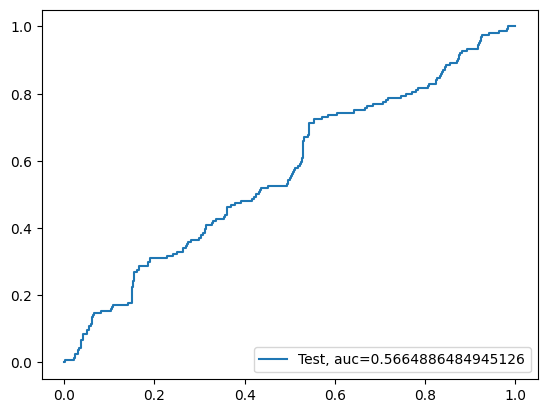

L1 roc_value: 0.9526999587199265
L1 threshold: 0.02476935942508175
ROC for the test dataset 95.3%


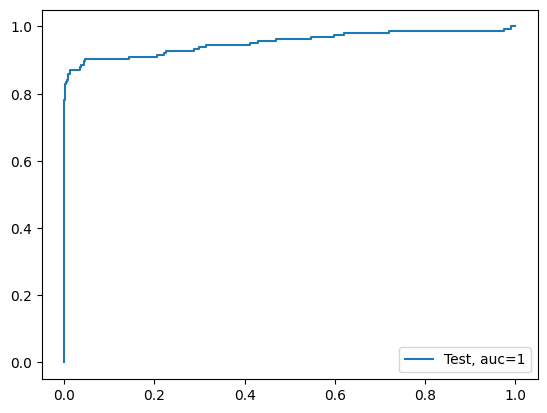

Time Taken by Model:--- 119.47284269332886 seconds ---
------------------------------------------------------------
KNN Model
model Score:
0.9983778545546473
Confusion Matrix


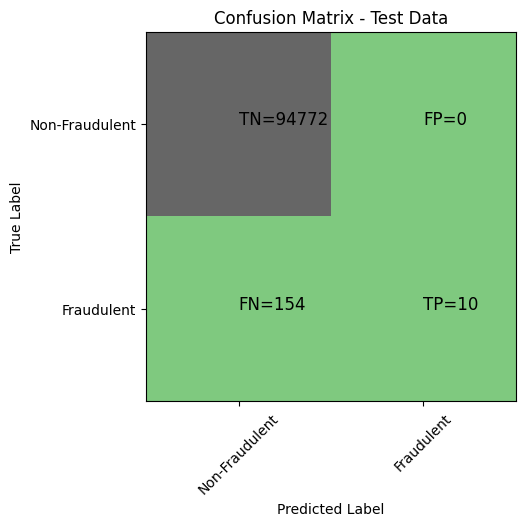

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       1.00      0.06      0.11       164

    accuracy                           1.00     94936
   macro avg       1.00      0.53      0.56     94936
weighted avg       1.00      1.00      1.00     94936

KNN roc_value: 0.6113830445958618
KNN threshold: 0.2
ROC for the test dataset: 61.1%


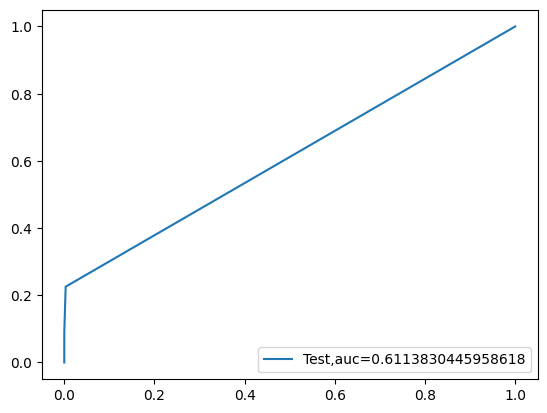

Time Taken by Model:--- 643.9424071311951 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score:0.9992942613971517
confusion Matrix


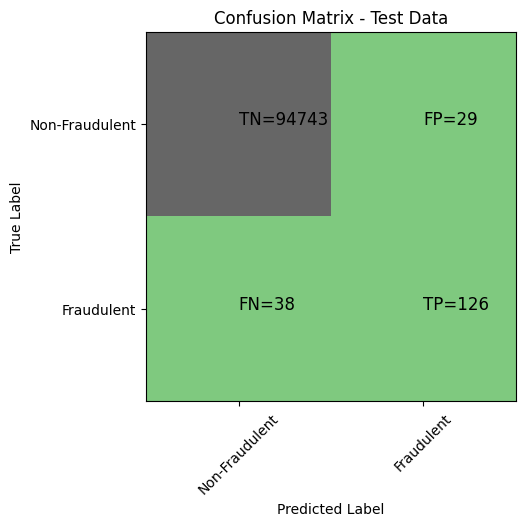

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.81      0.77      0.79       164

    accuracy                           1.00     94936
   macro avg       0.91      0.88      0.89     94936
weighted avg       1.00      1.00      1.00     94936

gini tree_roc_value:0.8839933426874049
Tree Threshold:1.0
ROC for the test dataset 88.4%


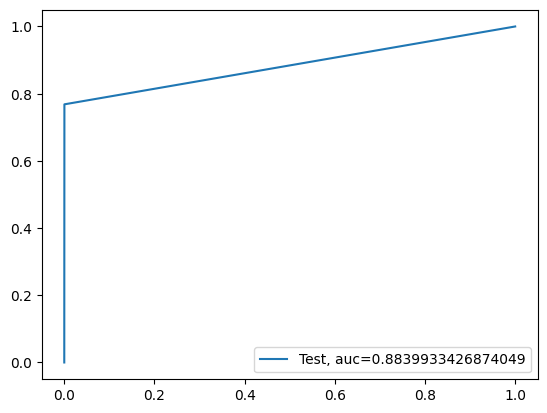

entropy score:0.9991889272773237
confusion Matrix


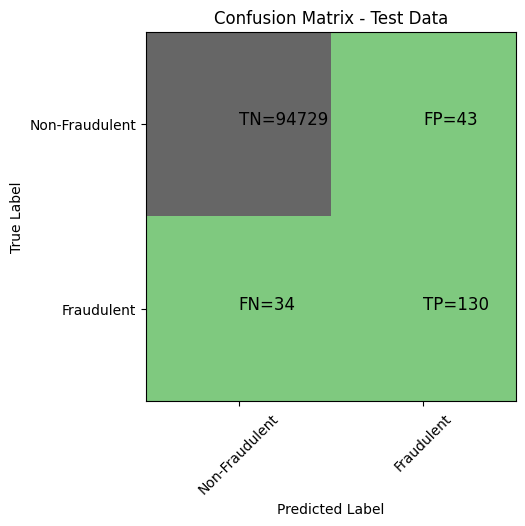

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.75      0.79      0.77       164

    accuracy                           1.00     94936
   macro avg       0.88      0.90      0.89     94936
weighted avg       1.00      1.00      1.00     94936

entropy tree_roc_value:0.8961146031605507
Tree Threshold:1.0
ROC for the test dataset 89.6%


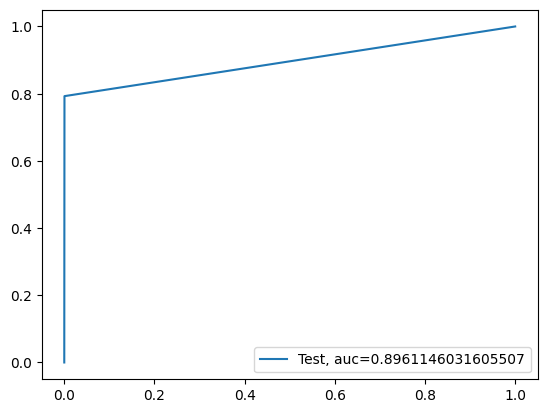

Time Taken by Model:--- 34.09323072433472 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996313305806017
Confusion Matrix


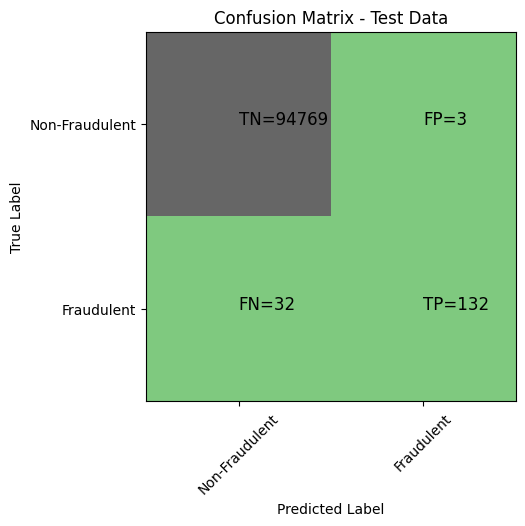

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.98      0.80      0.88       164

    accuracy                           1.00     94936
   macro avg       0.99      0.90      0.94     94936
weighted avg       1.00      1.00      1.00     94936

Random Forest roc_value: 0.9617656187430064
Random Forest threshold: 0.01
ROC for the test dataset 96.2%


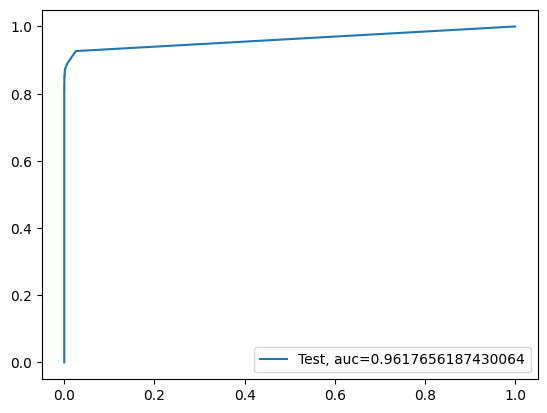

Time Taken by Model:--- 274.15659976005554 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.996903176877054
Confusion Matrix


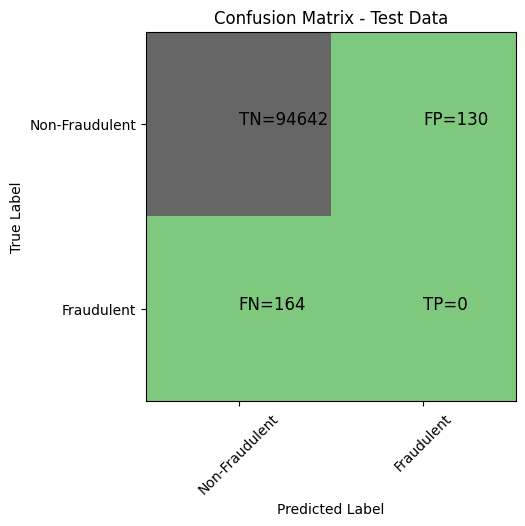

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.00      0.00      0.00       164

    accuracy                           1.00     94936
   macro avg       0.50      0.50      0.50     94936
weighted avg       1.00      1.00      1.00     94936

XGBoost roc_value: 0.4984014265816908
XGBoost threshold: inf
ROC for the latest dataset: 49.8%


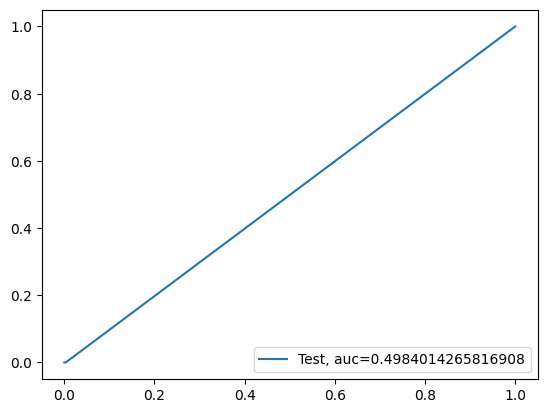

Time Taken by Model:--- 4.881145238876343 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score: 0.9982725204348193
Confusion Matrix


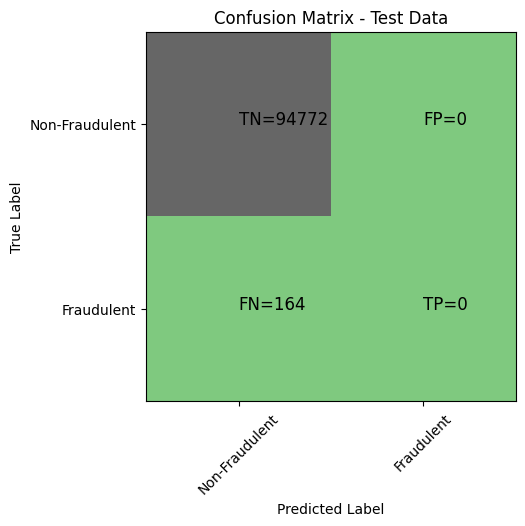

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94772
           1       0.00      0.00      0.00       164

    accuracy                           1.00     94936
   macro avg       0.50      0.50      0.50     94936
weighted avg       1.00      1.00      1.00     94936



In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import KFold



df_results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])
rkf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(rkf.split(X, y), start=1):
    print(f"\n=== Fold {fold} ===")
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

    print("Logistic Regression with L1 and L2 Regularisation")
    start_time = time.time()
    df_esults = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation",
                                           X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
    print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
    print('-' * 60)

    print("KNN Model")
    start_time = time.time()
    df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation",
                                      X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
    print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
    print('-' * 60)

    print("Decision Tree Models with 'gini' & 'entropy' criteria")
    start_time = time.time()
    df_Results = buildAndRunTreeModel(df_Results, "StratifiedKFold Cross Validation",
                                      X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
    print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
    print('-' * 60)

    print("Random Forest Model")
    start_time = time.time()
    df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation",
                                               X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
    print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
    print('-' * 60)

    print("XGBoost Model")
    start_time = time.time()
    df_Results = buildAndRunXGBBoostModels(df_Results, "StratifiedKFold Cross Validation",
                                           X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
    print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
    print('-' * 60)

    print("SVM Model with Sigmoid Kernel")
    start_time = time.time()
    df_Results = buildAndRunSVModels(df_Results, "StratifiedKFold Cross Validation",
                                     X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
    print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
    print('-' * 60)



In [ ]:
print(X_train_SKF_cv.isnull().sum())
print(X_test_SKF_cv.isnull().sum())
print(y_train_SKF_cv.isnull().sum())
print(y_test_SKF_cv.isnull().sum())



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64
0
0


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)

clf.fit(X_train_SKF_cv, y_train_SKF_cv)

print("Max auc_roc for L2:", clf.scores_[1].mean(axis=0).max())

print("Parameters for L2 regularisation")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)
y_pred_l2=clf.predict(X_test)
y_pred_probs_l2 = clf.predict_proba(X_test)[:, -1]

Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2,y_true=y_test)
print("Accuracy of Logistic Model with L2 Regularisation: {0}".format(Accuracy_l2))

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr - fpr)]
print("l2 threshold: {0}".format(threshold))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist

Max auc_roc for L2: nan
Parameters for L2 regularisation
[[-4.14767410e-05 -1.01528060e-09  5.24927318e-10 -1.46796434e-09
   7.06192906e-10 -5.23766533e-10 -1.33061572e-10 -8.49490406e-10
   4.18791393e-10 -5.32407294e-10 -8.46738939e-10 -1.15907397e-10
  -3.63916510e-10  4.84728764e-11 -6.43465513e-10 -1.38208816e-10
  -6.23373648e-10 -1.12784119e-09 -3.94742808e-10  1.46111077e-10
  -5.81828620e-11  9.22938936e-11  8.47195983e-11 -1.61964174e-10
   2.61277176e-11 -1.78155533e-10 -1.75524427e-10 -1.19270392e-10
  -5.42016055e-11 -4.33015843e-08]]
[-1.53386827e-09]
{np.int64(1): array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist

In [ ]:
import pandas as pd
import numpy as np
clf = LogisticRegression(penalty='l2', solver='liblinear')
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis=1)
coefficients.columns = ['Features', 'Importance Coefficient']


In [ ]:
coefficients

,Features,Importance Coefficient
0,Time,-4.147674e-05
1,V1,-1.015281e-09
2,V2,5.249273e-10
3,V3,-1.467964e-09
4,V4,7.061929e-10
5,V5,-5.237665e-10
6,V6,-1.330616e-10
7,V7,-8.494904e-10
8,V8,4.187914e-10
9,V9,-5.324073e-10


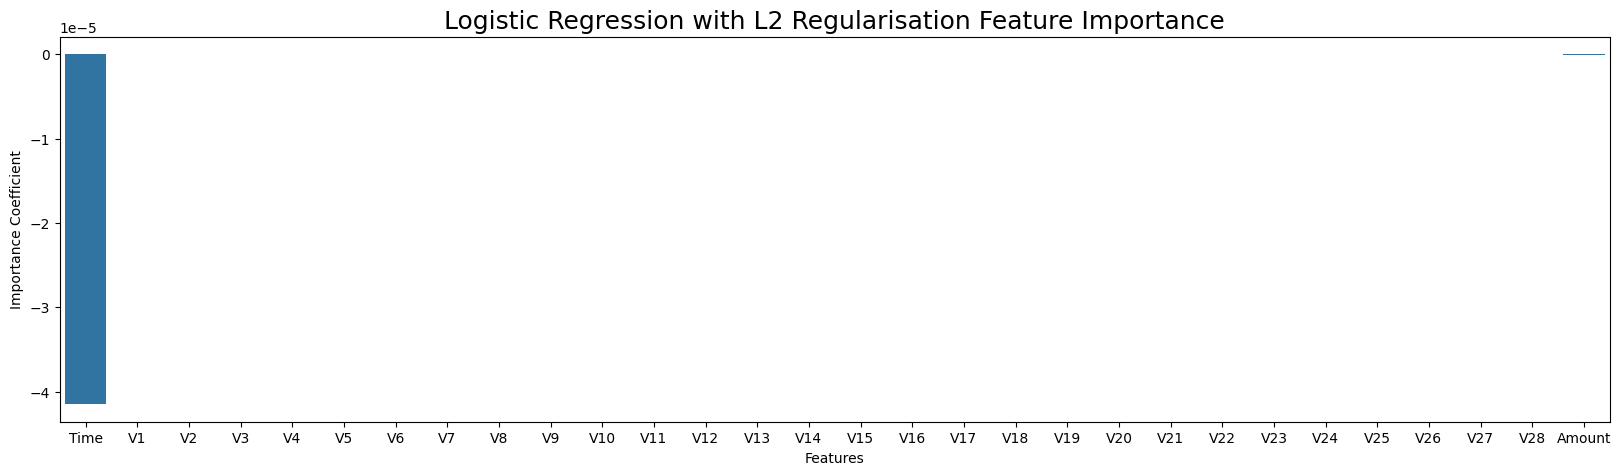

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.barplot(x='Features', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
!pip install --upgrade scikit-learn imbalanced-learn


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    ROS = RandomOverSampler(random_state=42)
    X_over, y_over = ROS.fit_resample(X_train, y_train)

    X_over = pd.DataFrame(X_over, columns=X.columns)
    # Now you can use X_over, y_over for training in this fold


  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)


Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.5985534389560172
Max auc_roc for l2: 0.5850364292865524
Parameters for l1 regularisations
[[-1.65494084e-05  7.73972222e-03 -1.45886085e-01 -2.13022346e-01
  -3.00117831e-02 -7.34580310e-02  2.02116116e-02  1.80341930e-01
  -3.82235080e-02 -3.67192004e-04 -6.73551615e-02 -1.61138920e-01
   5.66957601e-04 -1.77230406e-02 -6.42374096e-02 -2.02061300e-01
  -4.45958891e-02 -7.11655608e-02  5.75829460e-02 -3.73588267e-02
   2.88418202e-01  1.06338166e-01  4.52552018e-02 -7.88381342e-03
  -8.51127952e-04 -4.13496420e-01 -6.99007045e-02 -1.01444111e-01
   5.42355341e-02 -2.45525542e-03]]
[-3.22600757]
Parameters for l2 regularisations
[[-1.22671943e-04  2.18816090e-09 -1.66121117e-09 -7.77711255e-09
  -1.80563738e-09  1.16303217e-09 -1.14370050e-09  7.32650100e-10
  -2.84399949e-12 -4.29651806e-09  1.24546733e-09 -5.08696235e-09
   6.92928156e-09 -4.45202907e-09 -3.98052275e-09 -1.93895953e-10
   1.63475076e-10 -1.9945953

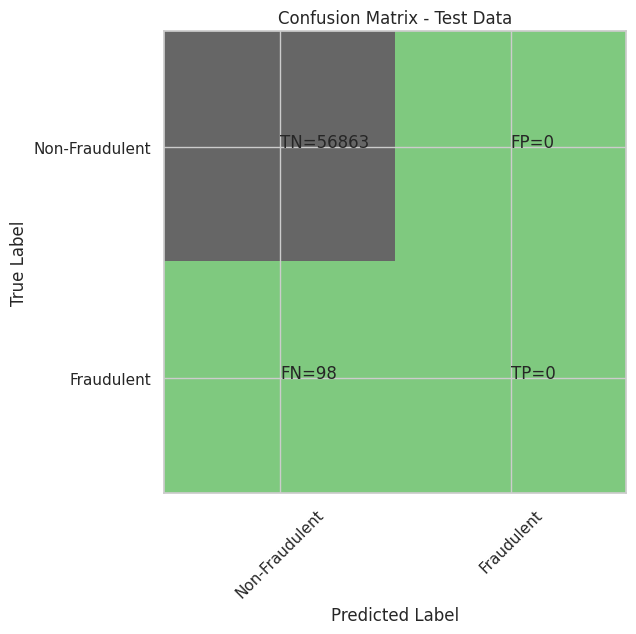

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic Model with L1 Regularisation: 0.9982619687154369
Confusion Matrix


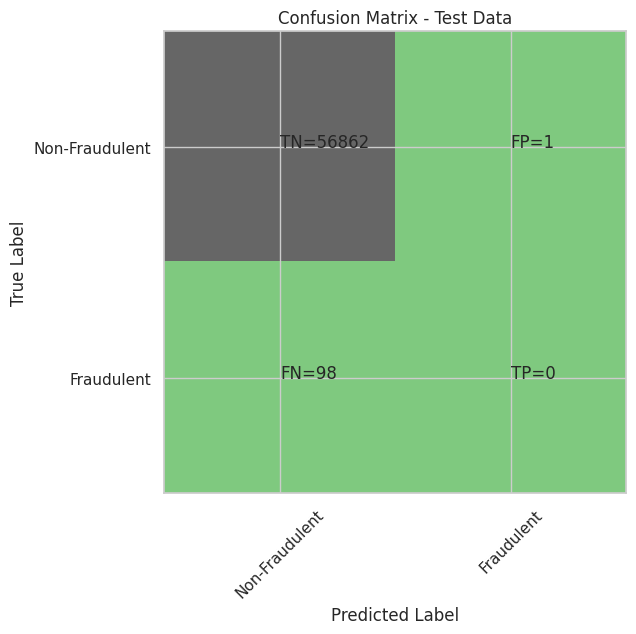

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5699317765901359
l2 threshold: 1.503189501362961e-06
ROC for the test dataset 57.0%


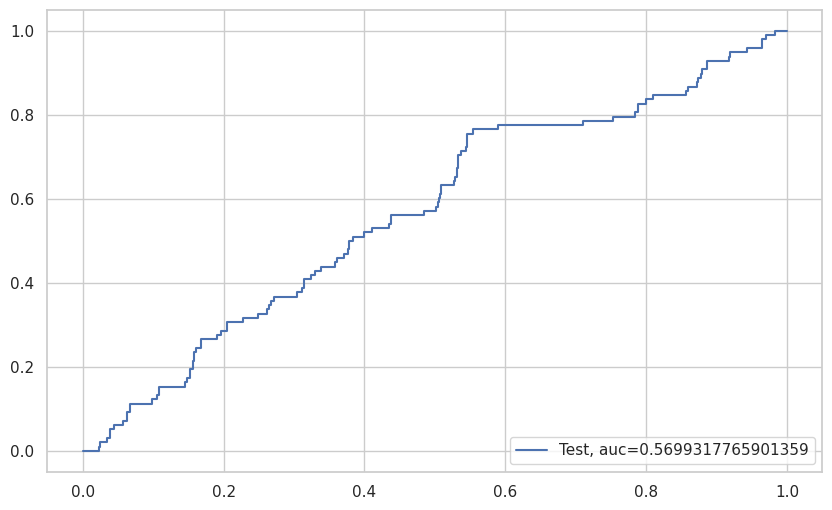

L1 roc_value: 0.7535083428232626
L1 threshold: 0.013159269747910665
ROC for the test dataset 75.4%


/tmp/ipython-input-2194351618.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_Results = pd.concat([df_Results, pd.DataFrame({


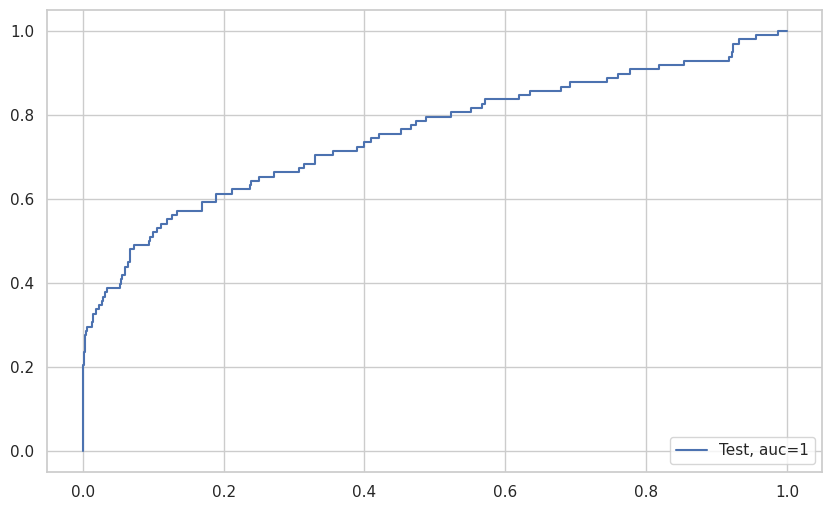

Time Taken by Model:--- 121.82041192054749 seconds ---
------------------------------------------------------------
KNN Model
model Score:
0.9981741893576307
Confusion Matrix


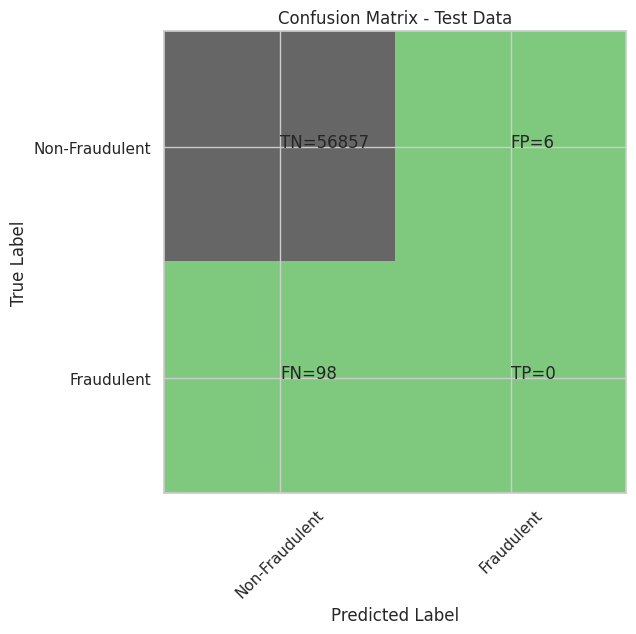

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5058836365385189
KNN threshold: 0.2
ROC for the test dataset: 50.6%


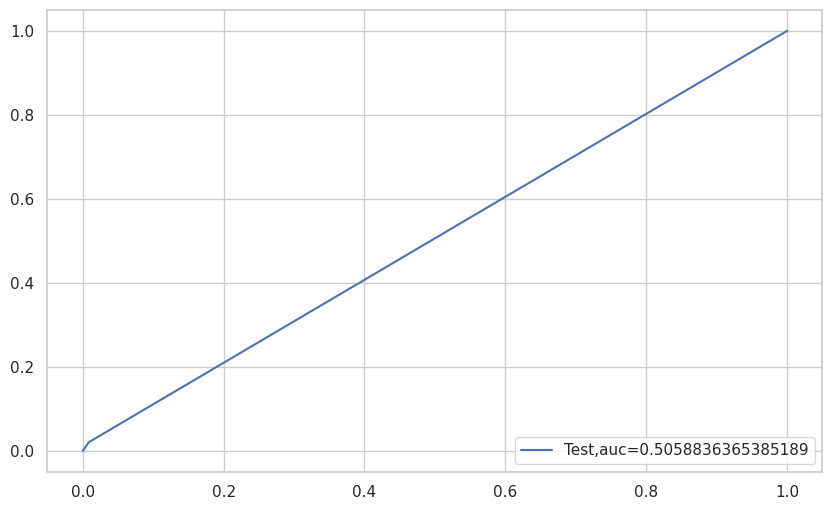

Time Taken by Model:--- 534.9097535610199 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score:0.9962605993574551
confusion Matrix


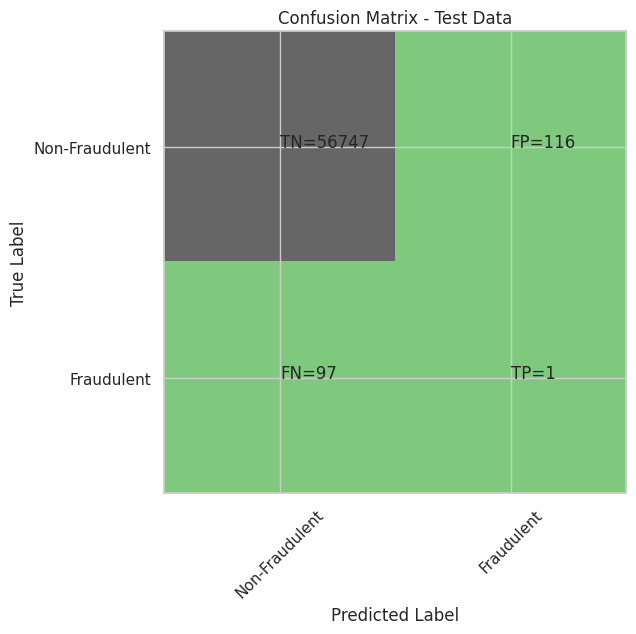

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.01      0.01      0.01        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.5040820453887198
Tree Threshold:1.0
ROC for the test dataset 50.4%


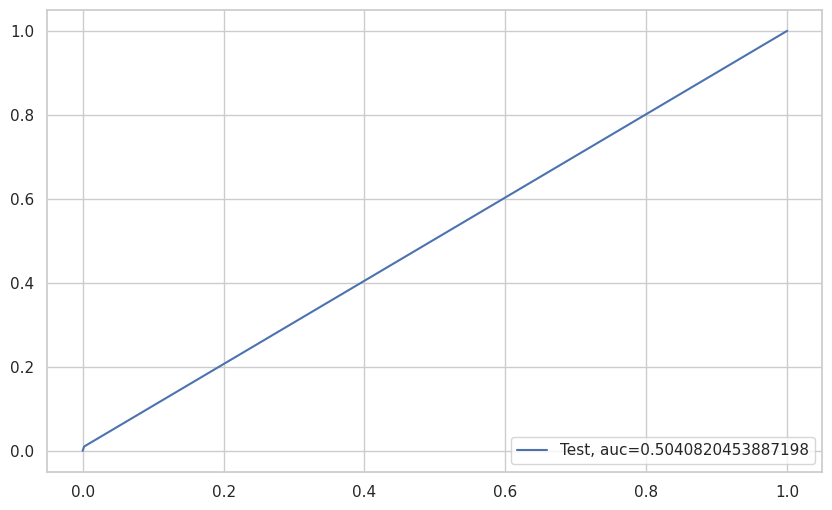

entropy score:0.9963483787152613
confusion Matrix


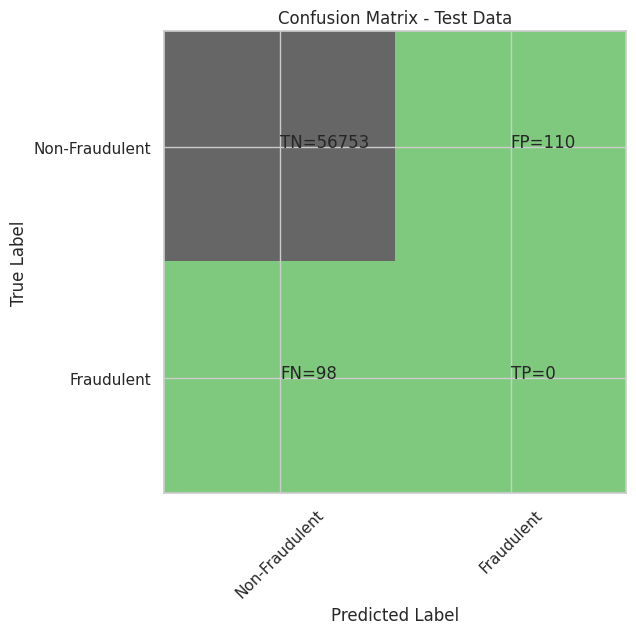

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.49903276295657983
Tree Threshold:inf
ROC for the test dataset 49.9%


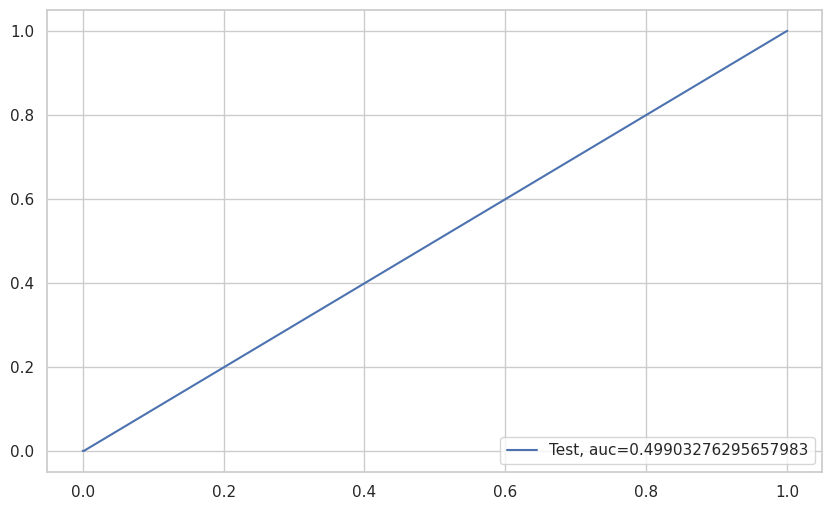

Time Taken by Model:--- 77.00101709365845 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9967346078896087
Confusion Matrix


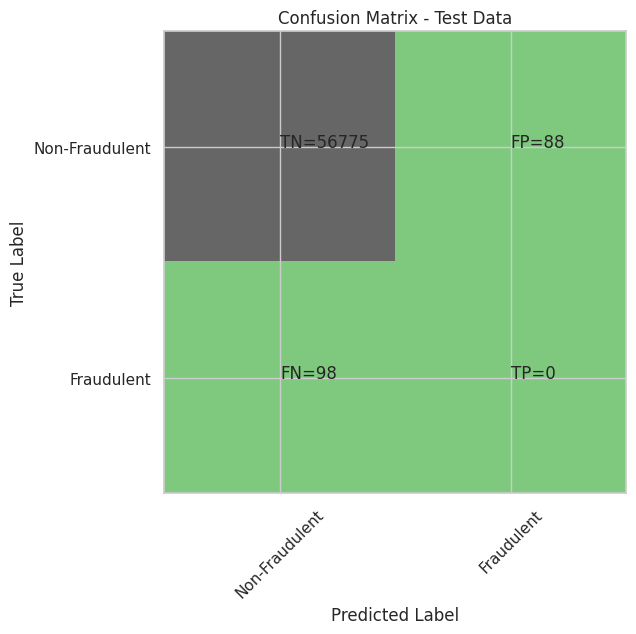

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.6840133482300997
Random Forest threshold: 0.01
ROC for the test dataset 68.4%


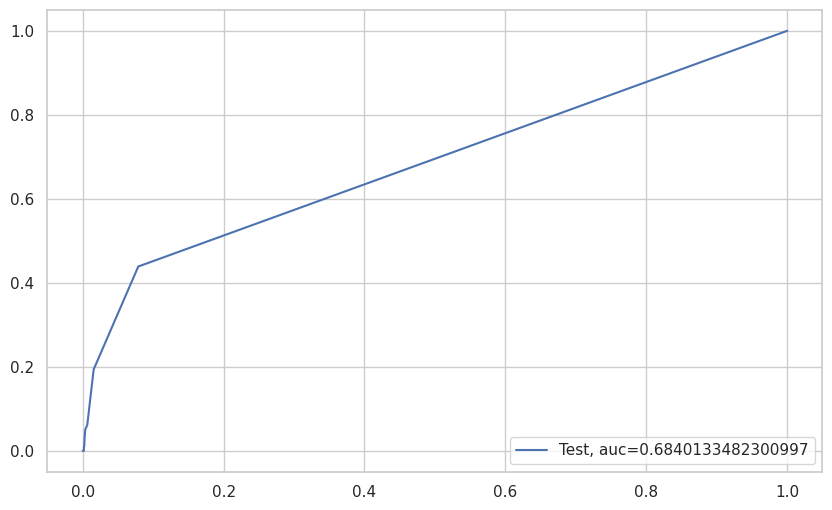

Time Taken by Model:--- 347.898428440094 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9970681694492723
Confusion Matrix


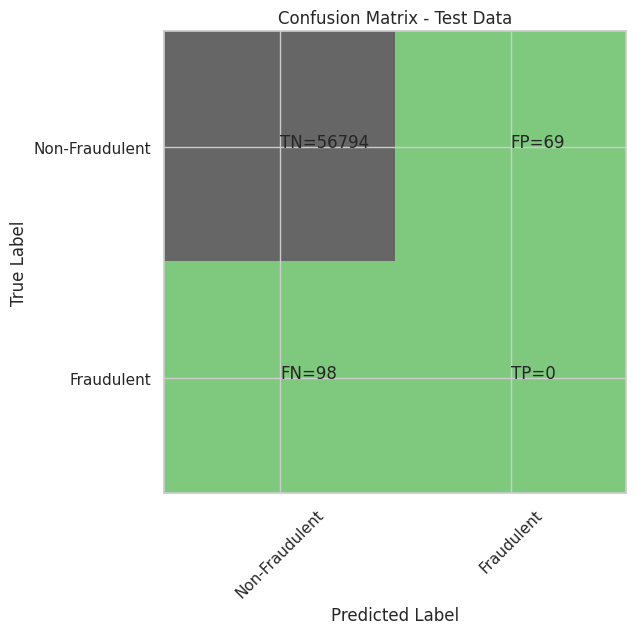

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.6462217460010401
XGBoost threshold: 0.00038255040999501944
ROC for the latest dataset: 64.6%


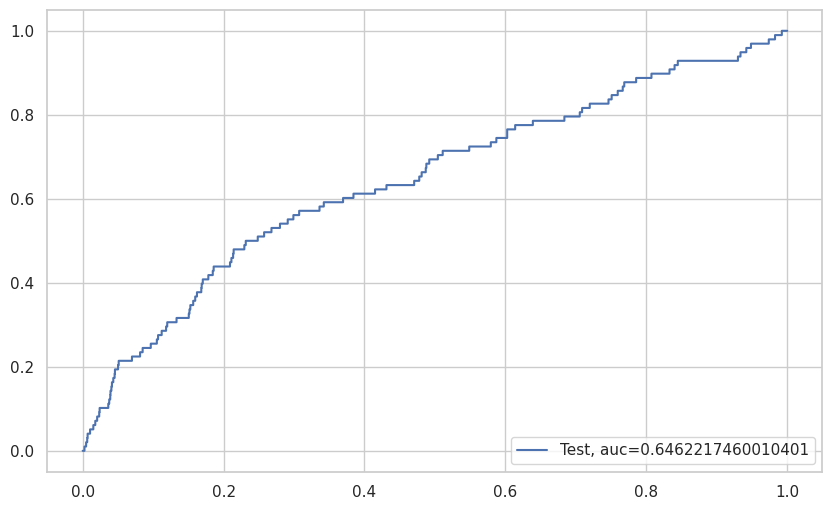

Time Taken by Model:--- 4.8814537525177 seconds ---
------------------------------------------------------------


In [ ]:
import time
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])
Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold CV"

print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation",
                                       X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation",
                                 X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results, "RepeatedKFold Cross Validation",
                                 X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation",
                                          X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBBoostModels(df_Results, "RepeatedKFold Cross Validation",
                                      X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 60)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
import pandas as pd
cols = X.columns
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

    X_over_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)


ImportError: cannot import name '_randomized_svd' from 'sklearn.utils.extmath' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py)

In [ ]:
Data_Imbalance_Handling = "ADASYN Oversampling with StratifiedFold CV"
ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)
X_over_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)
X_test_ADASYN = X_test.copy()
y_test_ADASYN = y_test.copy()
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,
                                       X_train_ADASYN, y_train_ADASYN, X_test_ADASYN, y_test_ADASYN)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling,
                                  X_train_ADASYN, y_train_ADASYN, X_test_ADASYN, y_test_ADASYN)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModel(df_Results, Data_Imbalance_Handling,
                                  X_train_ADASYN, y_train_ADASYN, X_test_ADASYN, y_test_ADASYN)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,
                                           X_train_ADASYN, y_train_ADASYN, X_test_ADASYN, y_test_ADASYN)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBBoostModels(df_Results, Data_Imbalance_Handling,
                                       X_train_ADASYN, y_train_ADASYN, X_test_ADASYN, y_test_ADASYN)
print("Time Taken by Model:--- %s seconds ---" % (time.time() - start_time))
print('-' * 80)

NameError: name 'over_sampling' is not defined

In [ ]:
param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 150),
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],
    'gamma': [i / 10.0 for i in range(7, 10)],
    'subsample': [i / 10.0 for i in range(7, 10)],
    'colsample_bytree': [i / 10.0 for i in range(7, 10)]
}

gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        base_score=0.5,
        booster='gbtree',
        colsample_bylevel=1,
        colsample_bynode=1,
        max_delta_step=0,
        missing=None,
        n_jobs=-1,
        nthread=None,
        objective='binary:logistic',
        random_state=42,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        seed=None,
        silent=None,
        verbosity=1
    ),
    param_distributions=param_test,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5
)

gsearch1.fit(X_over, y_over)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


In [ ]:
clf=XGBClassifier( base_score=0.5,
        booster='gbtree',
        colsample_bylevel=1,
        colsample_bynode=1,colsample_bytree=0.7,gamma=0.2,learning_rate=0.125,
        max_delta_step=0,max_depth=7,min_child_weight=5,missing=None,
        n_estimators=60,
        missing=None,
        n_jobs=1,
        nthread=None,
        objective='binary:logistic',
        random_state=42,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        seed=None,
        silent=None,
        verbosity=1) clf.fit(X_over, y_over)  XGB_test_score=clf.score(X_test, y_test) print('Model Accuracy:{0}'.format(XGB_test_score))
        XGB_probs=clf.predict_proba(X_test)[:,1]
        XGB_roc_value=roc_auc_score(y_test, XGB_probs) print("XGBoost roc_value: {0}".format(XGB_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("XGBoost threshold: {0}".format(threshold))

In [ ]:
imp_var=[]
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var=',imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('Top var=',imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('Top var=',imp_var.index(np.sort(clf.feature_importances_)[-3])+1)
Top var=14
2nd Top var=17
3rd Top var=10

In [ ]:
XGB_roc_value=roc_auc_score(y_test,XGB_probs)
print("XGBoost roc_value: {0}".format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold=thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))